In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import size, array
%matplotlib inline
import matplotlib.lines as lines
import matplotlib.gridspec as gridspec

from scipy.stats import probplot
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['font.family'] = 'monospace'

from time import time
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

import math
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# read in data
data = pd.read_pickle(r'/content/gdrive/MyDrive/MSDS_CAPSTONE/Data/master_data_final.pkl')

In [ ]:
data.columns

Index(['Title', 'Lang', 'Lang_eng', 'Rel_year', 'Rel_month', 'Distributor',
       'Netflix_orig', 'Genre', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History',
       'Genre_Horror', 'Genre_LGBTQ', 'Genre_Music', 'Genre_Musical',
       'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Sport',
       'Genre_Thriller', 'Genre_War', 'Genre_Western', 'Plot_summ',
       'Plot_keywords', 'Based_on_existing_material', 'Based_on_real_life',
       'Rating', 'Rating_General', 'Rating_Limited', 'Rating_Not rated',
       'Rating_Restricted', 'Rating_reason', 'Runtime', 'Writer_director',
       'Dir1', 'Dir1_films', 'Dir1_film_scores', 'Dir1_qual', 'Dir2',
       'Dir2_films', 'Dir2_film_scores', 'Dir2_qual', 'Dir3', 'Dir3_films',
       'Dir3_film_scores', 'Dir3_qual', 'Dir_avg_qual', 'Dir_qual_UNK',
       'Dir_nom_cnt', 'Writer1', 'Writer1_films', 'Writer

In [ ]:
data['RT_comb_score'].describe()

count    1003.000000
mean        0.458238
std         0.207565
min         0.000000
25%         0.308299
50%         0.454045
75%         0.586633
max         1.000000
Name: RT_comb_score, dtype: float64

In [ ]:
sep = data[data['Rel_month'] <= 9]
sep['RT_comb_score'].mean()

0.4395500670407641

In [ ]:
sep['RT_comb_score'].describe()

count    741.000000
mean       0.439550
std        0.199400
min        0.000000
25%        0.300867
50%        0.446861
75%        0.567919
max        1.000000
Name: RT_comb_score, dtype: float64

In [ ]:
q4 = data[data['Rel_month'] > 9]
q4['RT_comb_score'].mean()

0.511092769399025

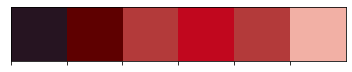

In [15]:
colors = ['#261421','#5e0000','#b33a3a','#c1071e','#b33a3a','#f2b0a5']
#bg_color = '#fbfbfb'
#txt_color = '#5c5c5c'

sns.palplot(colors)

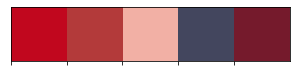

In [16]:
colors = ['#c1071e','#b33a3a','#f2b0a5','#43465e','#751a2c']
#bg_color = '#fbfbfb'
#txt_color = '#5c5c5c'

sns.palplot(colors)

In [13]:
bg_color = '#ffffff'
txt_color = '#141313'
#sns.palplot(bg_color)

## Distribution of the Movie Quality Score

{'boxes': [<matplotlib.lines.Line2D at 0x7f0f40df8e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0f412cced0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f412d6f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f412d69d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0f412cc450>,
  <matplotlib.lines.Line2D at 0x7f0f412cc990>]}

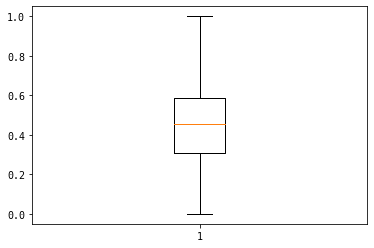

In [ ]:
plt.boxplot(data['RT_comb_score'])

Text(0.25823819068768755, 1.25, 'Mean: 0.5')

Text(0.6540449226548324, 1.25, 'Median: 0.5')

Text(0.5, 0, '')

Text(0, 0.5, '')

[]

{'boxes': [<matplotlib.patches.PathPatch at 0x7fc4b36f1410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc4b3697050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4b382c950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4b3820650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc4b380f510>,
  <matplotlib.lines.Line2D at 0x7fc4b37057d0>]}

Text(0.5, 0, '')

Text(0, 0.5, '')

[]

[]

Text(0.5, 0, '')

Text(0, 0.5, '')

[]

[]

Text(0.5, 1.0, '')

Text(0, 0.975, 'Movie Quality Score - Distribution')

Text(0.67, 0.8, 'Box-Plot')

Text(0.67, 0.175, 'Probability-Plot')

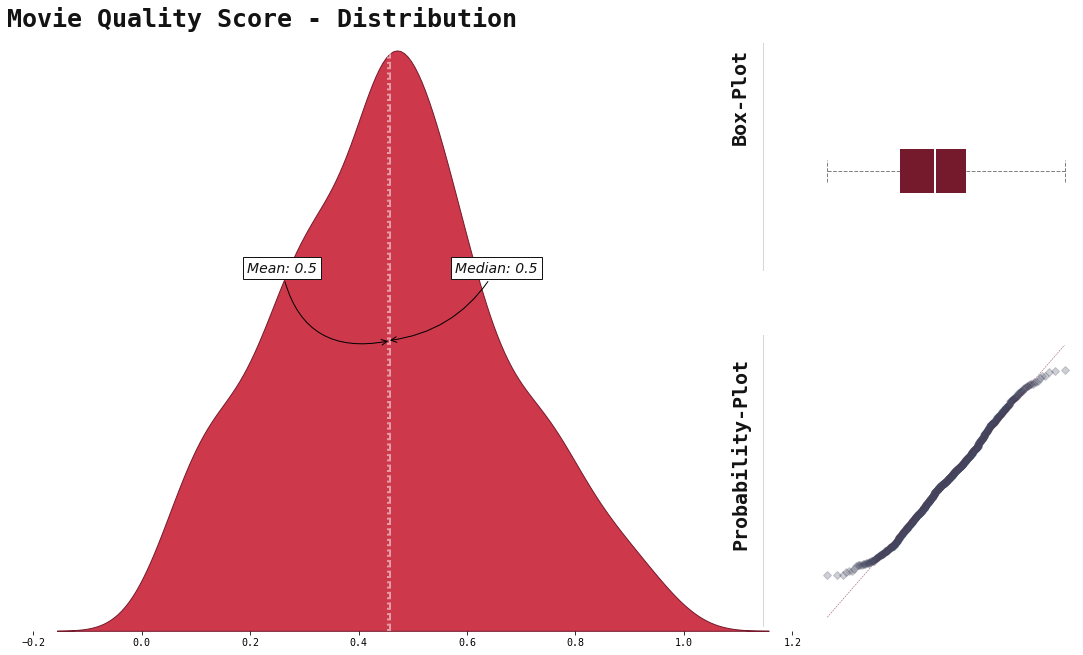

In [17]:
fig = plt.figure(tight_layout=True, figsize=(15,9))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3,1])

fig.patch.set_facecolor(bg_color)

ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)

mean = data['RT_comb_score'].mean()
median = data['RT_comb_score'].median()

#################
#### KDE-PLOT####
#################
ax0.axvline(x=mean, ymin=0, ymax=1, zorder=2, color='#fff', alpha=0.5, lw=2, ls='--')
ax0.axvline(x=median, ymin=0, ymax=1, zorder=2, color='#fff', alpha=0.5, lw=2, ls=':')

ax0.annotate(
    s=f"Mean: {np.round(mean,1)}",
    xy=(mean, 1),
    xytext=(mean - 0.2,1.25),
    color=txt_color,
    fontsize=14, fontweight='light', 
    fontfamily='calibri', fontstyle='italic',
    va='center', ha='center',
    bbox=dict(
        boxstyle='square,pad=0.3',
        facecolor=bg_color,edgecolor=txt_color
    ),
    arrowprops=dict(
        arrowstyle='->', 
        color='#000',
        connectionstyle='arc3, rad=0.5'
    )
)

ax0.annotate(
    s=f"Median: {np.round(median,1)}",
    xy=(median, 1),
    xytext=(median + 0.2, 1.25),
    color=txt_color,
    fontsize=14, #fontweight='light', 
    fontfamily='sans-serif', fontstyle='italic',
    va='center', ha='center',
    bbox=dict(
        boxstyle='square,pad=0.3',
        facecolor=bg_color,edgecolor=txt_color
    ),
    arrowprops=dict(
        arrowstyle='->', 
        color='#000',
        connectionstyle='arc3, rad=-0.25'
    )
)

sns.kdeplot(
    data=data, x='RT_comb_score', shade=True, color=colors[0],edgecolor=colors[4], lw=1, alpha=0.8, ax=ax0, zorder=1
)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_yticks([])

##################
#### BOX-PLOT ####
##################

ax1.boxplot(
    data=data, x='RT_comb_score',
    vert=False, patch_artist=True,
    boxprops=dict(facecolor=colors[4], color='#fff', lw=0),
    whiskerprops=dict(color='gray', lw=1, ls='--'),
    capprops=dict(color='gray', lw=1, ls='--'),
    medianprops=dict(color='#fff', lw=2),
    flierprops=dict(markerfacecolor=colors[0],alpha=0.75)
)

#ax1.annotate(
#    s='Right -outliers',
#    xy=(200, 165),
#    xytext=(190,225),
#    color=txt_color,
#    fontsize=14, fontweight='light', 
#    fontfamily='calibri', fontstyle='italic',
#    xycoords='axes points',
#    arrowprops=dict(arrowstyle="<-",connectionstyle="arc3, rad=-0.25")
    #arrowprops=dict(arrowstyle='-[', widthB=1.0,lengthB=0.2,angleB=None)
#)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])

###################
#### PROB-PLOT ####
###################

res = probplot(x=data['RT_comb_score'], plot=ax2)

l0 = ax2.get_lines()[0]
l1 = ax2.get_lines()[1]

l0.set_marker('D')
l0.set_alpha(0.25)
l0.set_color(colors[3])
l1.set_color(colors[4])
l1.set_linestyle('--')
l1.set_linewidth(0.5)
l1.set_alpha(0.75)

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('')

# Text & Titles
fig.text(
    s='Movie Quality Score - Distribution',
    x=0, y=0.975,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    Our Content Quality Score is more or less normally distributed.
#    However we do have some outliers to 
#    the right of the curve, which can
#    be seen in the boxplot as well as 
#    on the probability distribution plot.
#    ''',
#    x=0, y=0.85,
#    color=txt_color
#)

fig.text(
    s='Box-Plot', rotation=90, 
    x=0.67, y=0.80,fontsize=20,
    color=txt_color , fontweight='bold'
)

fig.text(
    s='Probability-Plot', rotation=90, 
    x=0.67, y=0.175,
    color=txt_color,fontsize=20,fontweight='bold'
)

# seperation lines
sl1 = lines.Line2D(xdata=[0.7,0.7], ydata=[0.05,0.5], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
sl2 = lines.Line2D(xdata=[0.7,0.7], ydata=[0.6,0.95], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
fig.lines.extend([sl1, sl2])

# despine
for spine in ['top','left','right','bottom']:
    ax0.spines[spine].set_visible(False)
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# show
plt.show()

In [37]:
#data.head(5)
data['Title_new']= data['Title']+ data['Rel_year'].astype(str)
data['Title_new'].value_counts()

#Alive2020                    1
Stockholm2018                 1
Jacob's Ladder2019            1
Under the Silver Lake2018     1
No One Gets Out Alive2021     1
                             ..
Extra Ordinary2019            1
Non-Fiction2018               1
A Prayer Before Dawn2017      1
Perfectos desconocidos2017    1
Just Getting Started2017      1
Name: Title_new, Length: 1003, dtype: int64

In [19]:
# create a helper function
def group_df(data:pd.DataFrame, col:str) -> pd.DataFrame:
    tmp = data.groupby(col).agg({'Title_new':'count','Runtime':'mean','RT_comb_score':'mean'})
    tmp = tmp.sort_values(by='Title_new', ascending=False).reset_index()
    tmp = tmp.rename(columns={'Title_new':'Count', 'Runtime':'MeanRuntime','RT_comb_score':'MeanScore'})
    return tmp

In [20]:
data['Genre']= data['Genre'].astype(str)

In [21]:
# create grouped dataframes for analysis
data_genre = group_df(data,'Genre')[:5]
# calculate ratio for alpha values
data_genre['Ratio'] = data_genre['Count'].apply(lambda x: x / data_genre['Count'].sum())

In [22]:
temp =(data.groupby(['Rel_year', 'Title_new']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='Title_new'))

In [23]:
tmp = temp.groupby('Rel_year').agg({'Title_new':'count'}).reset_index()
tmp = tmp.rename(columns={'Title_new':'Count'})
tmp.columns

Index(['Rel_year', 'Count'], dtype='object')

In [24]:
data_time = tmp.copy()

[]

(2017.0, 2022.0)

Text(0, 0.975, 'Number of Titles over Time (until 2022)')

Text(0.77, 0.97, 'Total Movies:')

Text(0.85, 0.93, '1003')

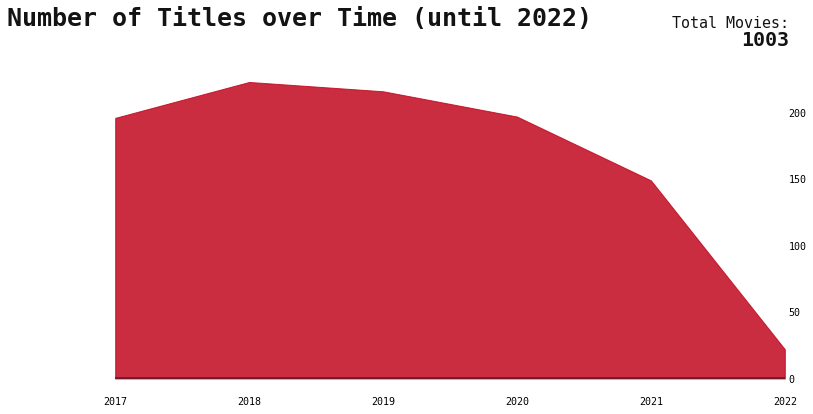

In [25]:
# basic overview how many titles over time
data_time = data_time[data_time['Rel_year'] <= 2022]
data_time = data_time.rename(columns={'Title_new':'Count'})
sum_titles = data_time['Count'].sum()

# plot
fig, ax = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.plot(data=data_time['Rel_year'], y1= data_time['Count'], color=colors[4], lw=0.5)
ax.fill_between(x=data_time['Rel_year'], y1=0, y2=data_time['Count'], color=colors[0], alpha=0.85)

ax.axhline(y=0, color=colors[4], lw=2, alpha=1)
ax.set_xlim(data_time['Rel_year'].min(), data_time['Rel_year'].max())

ax.yaxis.tick_right()
ax.tick_params(axis='both', which='both', length=0)

# Text & Titles
fig.text(
    s='Number of Titles over Time (until 2022)',
    x=0, y=0.975,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    The amount of titles added by Netflix
#    has steadily risen increased over the years. 
#    Note that 2022 data only includes Q1 releases
 #   ''',
 #   x=-0.01, y=0.85,
 #   color=txt_color
#)

fig.text(
    s='Total Movies:',
    x=0.770, y=0.97,
    color=txt_color,
    fontsize=15,
)

fig.text(
    s=sum_titles,
    x=0.85, y=0.93,
    color=txt_color,
    fontsize= 20,fontweight='bold'
)

# seperation lines
sl1 = lines.Line2D(xdata=[0.75,0.75], ydata=[0.9,1], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
#sl2 = lines.Line2D(xdata=[0.75,0.80], ydata=[0.9,0.92], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
#fig.lines.extend([sl1,sl2])

# despine
for spine in ['top','left','right','bottom']:
    ax.spines[spine].set_visible(False)

plt.show()

There are 1003 films represented in the dataset and 98 columns.

In [ ]:
colors = ['#261421','#5e0000','#b33a3a','#c1071e','#b33a3a','#f2b0a5']
bg_color = '#fbfbfb'
txt_color = '#5c5c5c'

(0.0, 100.0, 0.0, 100.0)

Text(0, 1.1, 'Best and Worst Titles (Top 5)')

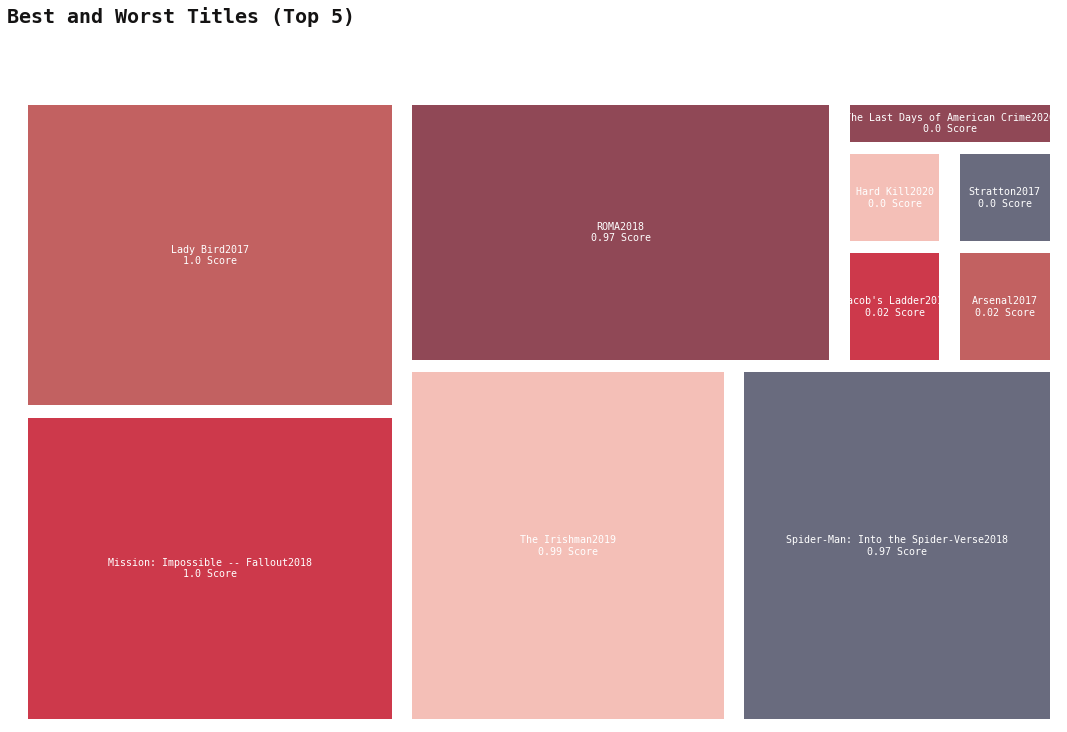

In [38]:
import squarify

df_top_titles = data.groupby('Title_new').mean()['RT_comb_score'].nlargest(5)
df_flop_titles = data.groupby('Title_new').mean()['RT_comb_score'].nsmallest(5).sort_values(ascending=False)
df_titles = pd.concat([df_top_titles, df_flop_titles])
df_titles = pd.DataFrame({'Title_new':df_titles.index,'RT_comb_score':df_titles.values})
df_titles['RT_comb_score'] = round(df_titles['RT_comb_score'],2)
# create labels for treemap
labels = [label +'\n'+ str(score) +' Score' for label, score in zip(df_titles['Title_new'],df_titles['RT_comb_score'])]

fig, ax = plt.subplots(tight_layout=True, figsize=(15,9))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# create treemap
squarify.plot(
    sizes=df_titles['RT_comb_score']*100+10, label=labels, color=colors, alpha=0.8
    ,pad=0.05, ax=ax, text_kwargs=dict(color='white', fontsize=10)
)

ax.axis('off')

# Text & Titles
fig.text(
    s='Best and Worst Titles (Top 5)',
    x=0, y=1.1,
    color=txt_color,
    fontsize=20, fontweight='bold'
)



plt.show()

In [ ]:
data['Dir_nom_cnt'].value_counts()

0     909
1      60
2      25
3       4
4       2
8       1
5       1
10      1
Name: Dir_nom_cnt, dtype: int64

In [ ]:
data['Runtime'].min(), data['Runtime'].max()

(57, 209)

{'boxes': [<matplotlib.patches.PathPatch at 0x7fc4b62b6e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc4b6254b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4b6254f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4b62855d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc4b6254050>,
  <matplotlib.lines.Line2D at 0x7fc4b6254610>]}

Text(0, 1.1, 'Runtime - Distribution and Relation with Quality Score')

Text(0.5, 1, '\n    Runtime vs. Quality Score\n    ')

Text(0, 1, '\n    Runtime Distribution\n    ')

Text(0, 0.34, '\n    Runtime Outliers\n    ')

Text(0.5, 0, '')

Text(0, 0.5, '')

[]

[]

[]

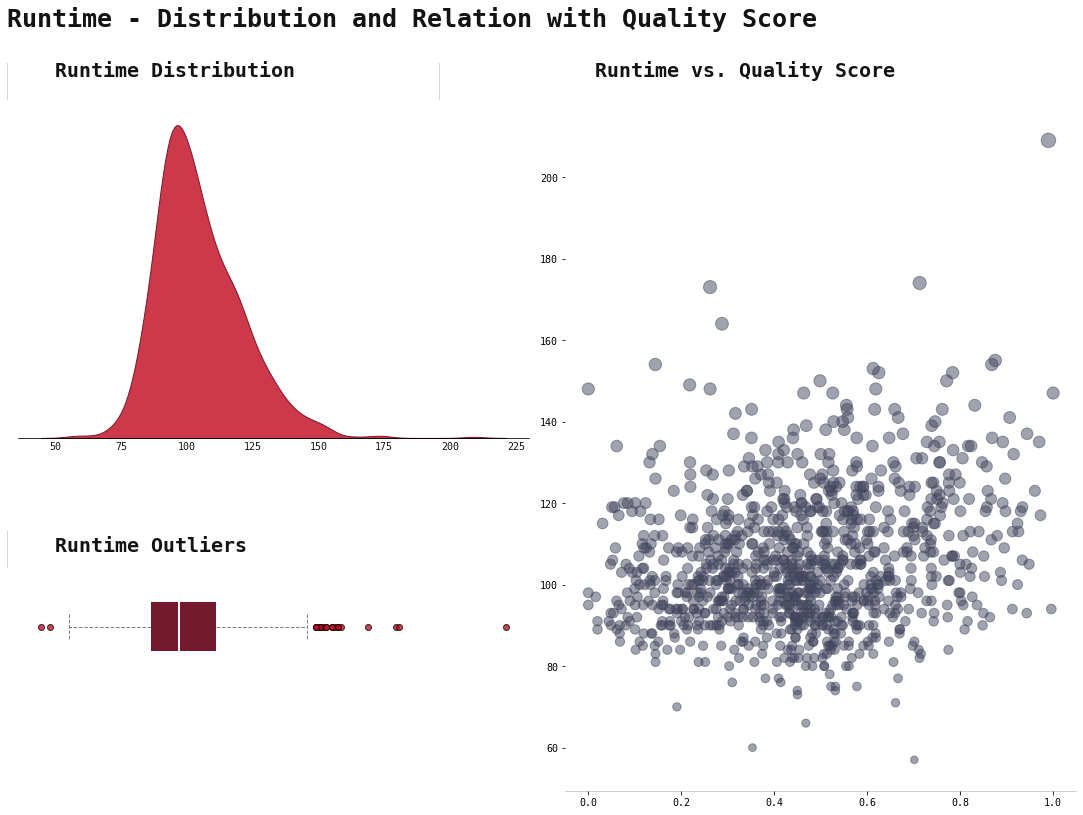

In [26]:
# figure, grid
fig = plt.figure(tight_layout=True, figsize=(15,10))
gs = gridspec.GridSpec(nrows= 2, ncols=2)

fig.patch.set_facecolor(bg_color)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

# plots
ax0 = sns.kdeplot(
    data=data, x='Runtime', ax=ax0,
    shade=True, color=colors[0],
    edgecolor=colors[4], lw=1, alpha=0.8
)

ax1.boxplot(
    data=data, x='Runtime',
    vert=False, patch_artist=True,
    boxprops=dict(facecolor=colors[4], color='#fff', lw=0),
    whiskerprops=dict(color='gray', lw=1, ls='--'),
    capprops=dict(color='gray', lw=1, ls='--'),
    medianprops=dict(color='#fff', lw=2),
    flierprops=dict(markerfacecolor=colors[0],alpha=0.75)
)

ax2.scatter(
    y=data['Runtime'], x=data['RT_comb_score'],
    color=colors[3], alpha=0.5, s=1*data['Runtime']
)

# Text & Titles
fig.text(
    s='Runtime - Distribution and Relation with Quality Score',
    x=0, y=1.1,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    as we can see the runtime is negatively skewed with
#    outliers to the left. From the scatterplot we can tell
#    that there is no relation between runtime and Quality Score.
#    ''',
#    x=0, y=1.02,
#    color=txt_color
#)

fig.text(
    s='''
    Runtime vs. Quality Score
    ''',
    x=0.5, y= 1,
    color=txt_color,fontsize= 20,fontweight='bold'
)

fig.text(
    s='''
    Runtime Distribution
    ''',
    x=0, y= 1,
    color=txt_color,fontsize= 20,fontweight='bold'
)

fig.text(
    s='''
    Runtime Outliers
    ''',
    x=0, y=0.34,
    color=txt_color,fontsize= 20,fontweight='bold'
)

# seperation lines
sl1 = lines.Line2D(xdata=[0.4,0.4], ydata=[1,1.05], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
sl2 = lines.Line2D(xdata=[0,0.0], ydata=[1,1.05], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
sl3 = lines.Line2D(xdata=[0,0.0], ydata=[0.35,0.4], lw=1, alpha=0.5, color='#aeaeae', transform=fig.transFigure, figure=fig)
fig.lines.extend([sl1,sl2,sl3])

# ax colors
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)

# labels & ticks
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_yticks([])

ax1.set_yticks([])
ax1.set_xticks([])

#ax2.set_yticks([])

ax0.tick_params(length=0, colors=txt_color)
#ax2.tick_params(length=0, colors=txt_color)

# despine
for spine in ['top','left','right','bottom']:
    ax1.spines[spine].set_visible(False)
    
for spine in ['top','left','right']:
    ax0.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

ax2.spines['bottom'].set_color(txt_color)
ax2.spines['bottom'].set_alpha(0.25)

plt.show()

Text(0, 0.5, '')

Text(0.5, 0, '')

Text(0.1, 1, 'Genres versus Quality Score')

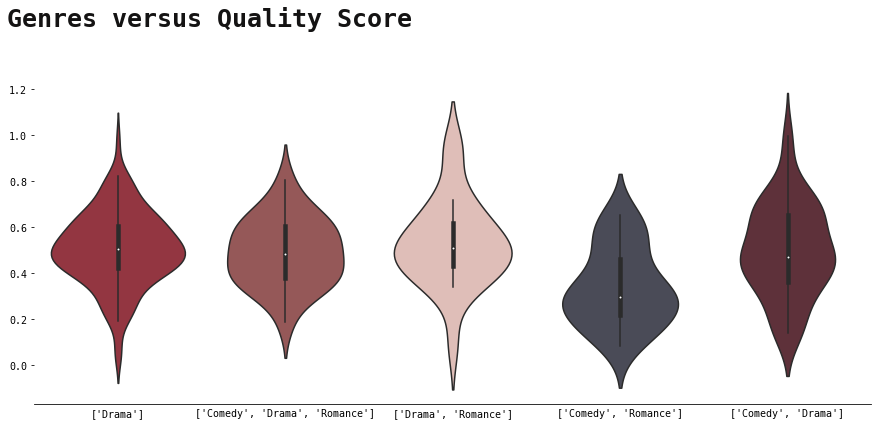

In [27]:
# prepare data for top genre boxplot
cols = [*data_genre['Genre'].value_counts().index]

data_top_genre = data.copy()
data_top_genre['TopGenre'] = data_top_genre['Genre'].apply(lambda x: 1 if x in cols else 0)
data = data_top_genre[data_top_genre['TopGenre'] == 1]

# violin plot
fig, ax = plt.subplots(figsize=(15,6))

fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

sns.violinplot(data=data, x='Genre', y='RT_comb_score', palette=colors, saturation=0.5, ax=ax)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x',length=0)

# despine
for spine in ['top','left','right']:
    ax.spines[spine].set_visible(False)

# Text & Titles
fig.text(
    s='Genres versus Quality Score',
    x=0.1, y=1,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    Dramas have are the highest scoring genre,
#    interestingly have more postive outliers.  
#    ''',
#    x=0.09, y=1.02,
#    color=txt_color
#)

plt.show()

In [29]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
data_language = group_df(data,'Lang')[:5]
data_language

,Lang,Count,MeanRuntime,MeanScore
0,English,174,101.235632,0.470931
1,French,16,112.312500,0.523820
2,Spanish,9,106.777778,0.579939
3,German,4,120.500000,0.491477
4,Japanese,3,116.333333,0.507436


<BarContainer object of 5 artists>

[]

Text(0, 0.5, '')

<BarContainer object of 5 artists>

[]

Text(0, 0.5, '')

Text(English, 0.1, ' 0.47 ')

Text(English, 60, ' 101 min')

Text(French, 0.1, ' 0.52 ')

Text(French, 60, ' 112 min')

Text(Spanish, 0.1, ' 0.58 ')

Text(Spanish, 60, ' 106 min')

Text(German, 0.1, ' 0.49 ')

Text(German, 60, ' 120 min')

Text(Japanese, 0.1, ' 0.51 ')

Text(Japanese, 60, ' 116 min')

(0.0, 100.0, 0.0, 100.0)

Text(0, 0.975, 'TOP 5 - Languages by number of titles (size), average score and runtime')

Text(0.1075, 0.17, 'Avg. Score')

Text(0.5275, 0.17, 'Avg. Runtime')

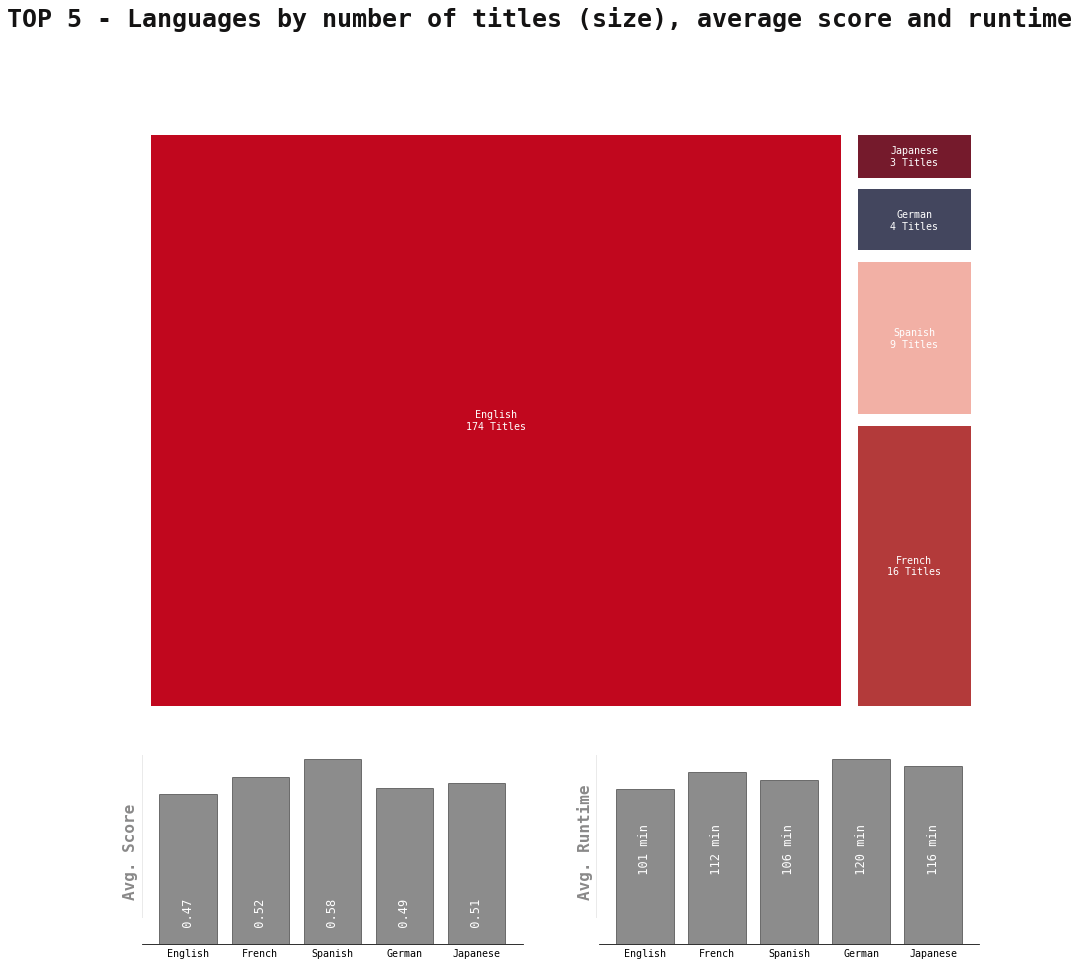

In [31]:
fig = plt.figure(figsize=(15,15))

gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[3,1])

ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

fig.patch.set_facecolor(bg_color)
fig.subplots_adjust(wspace=0.2, hspace=0.1)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)

# create labels for treemap
labels = [label +'\n'+ str(count) +' Titles' for label, count in zip(data_language['Lang'],data_language['Count'])]

# create treemap
squarify.plot(
    sizes=data_language['Count'], label=labels, color=colors, 
    pad=True, ax=ax0, text_kwargs=dict(color='white', fontsize=10, fontweight='light'))

# average runtime
ax1.bar(
    x=data_language['Lang'], height=data_language['MeanScore'],
    color='#000', edgecolor='#000', lw=1, alpha=0.45
)


ax1.tick_params(length=0)
ax1.set_yticks([])
ax1.set_ylabel('')

# average scores
ax2.bar(
    x=data_language['Lang'], height=data_language['MeanRuntime'],
    color='#000', edgecolor='#000', lw=1, alpha=0.45
)

ax2.tick_params(length=0)
ax2.set_yticks([])
ax2.set_ylabel('')

# annotations
for idx in range(0,5): #len(data_language['Lang'])
    ax1.annotate(
        s=f" {np.round(data_language['MeanScore'][idx],2)} ",
        xy=(data_language['Lang'][idx], 0.1),
        rotation=90,
        va='center', ha='center',
        color='#fff', fontsize=12
    )
    ax2.annotate(
        s=f" {int(data_language['MeanRuntime'][idx])} min",
        xy=(data_language['Lang'][idx], 60),
        rotation = 90,
        va='center', ha='center',
        color='#fff', fontsize=12
    )
    
# despine
ax0.axis('off')
for spine in ['top','left','right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Text & Titles
fig.text(
    s='TOP 5 - Languages by number of titles (size), average score and runtime',
    x=0, y=0.975,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    by number of titles (size)
#    average score and runtime
#    ''',
#    x=0.09, y=0.925,
#    color=txt_color, font = 16
#)

fig.text(
    s='Avg. Score',
    rotation=90,
    x=0.1075, y=0.17,
    color=txt_color,
    fontsize=16,alpha=0.5,fontweight='bold'
)

fig.text(
    s='Avg. Runtime',
    rotation=90,
    x=0.5275, y=0.17,
    color=txt_color,
    fontsize=16,alpha=0.5, fontweight='bold'
)

sl1 = lines.Line2D(xdata=[0.125,0.125], ydata=[0.15,0.3], lw=1, alpha=0.25, color='#aeaeae', transform=fig.transFigure, figure=fig)
sl2 = lines.Line2D(xdata=[0.545,0.545], ydata=[0.15,0.3], lw=1, alpha=0.25, color='#aeaeae', transform=fig.transFigure, figure=fig)
fig.lines.extend([sl1,sl2])

plt.show()

In [40]:
data_dist = group_df(data,'Distributor')[:10]
data_dist

,Distributor,Count,MeanRuntime,MeanScore
0,Netflix,278,107.208633,0.438841
1,IFC Films,34,101.264706,0.473282
2,Lionsgate,30,105.500000,0.349625
3,A24,27,107.000000,0.630192
4,Warner Bros.,24,116.458333,0.526763
5,Universal Pictures,23,110.869565,0.507724
6,Vertical Entertainment,22,99.863636,0.300777
7,Saban Films,20,101.300000,0.293731
8,Walt Disney Studios Motion Pictures,19,123.631579,0.711992
9,Bleecker Street Media,14,107.357143,0.600121


<BarContainer object of 10 artists>

[]

Text(0, 0.5, '')

<BarContainer object of 10 artists>

[]

Text(0, 0.5, '')

Text(Netflix, 0.1, ' 0.44 ')

Text(Netflix, 60, ' 107 min')

Text(IFC Films, 0.1, ' 0.47 ')

Text(IFC Films, 60, ' 101 min')

Text(Lionsgate, 0.1, ' 0.35 ')

Text(Lionsgate, 60, ' 105 min')

Text(A24, 0.1, ' 0.63 ')

Text(A24, 60, ' 107 min')

Text(Warner Bros., 0.1, ' 0.53 ')

Text(Warner Bros., 60, ' 116 min')

(0.0, 100.0, 0.0, 100.0)

Text(0, 0.975, 'TOP 10 - Distributors by number of titles (size), average score and runtime')

Text(0.1075, 0.17, 'Avg. Score')

Text(0.5275, 0.17, 'Avg. Runtime')

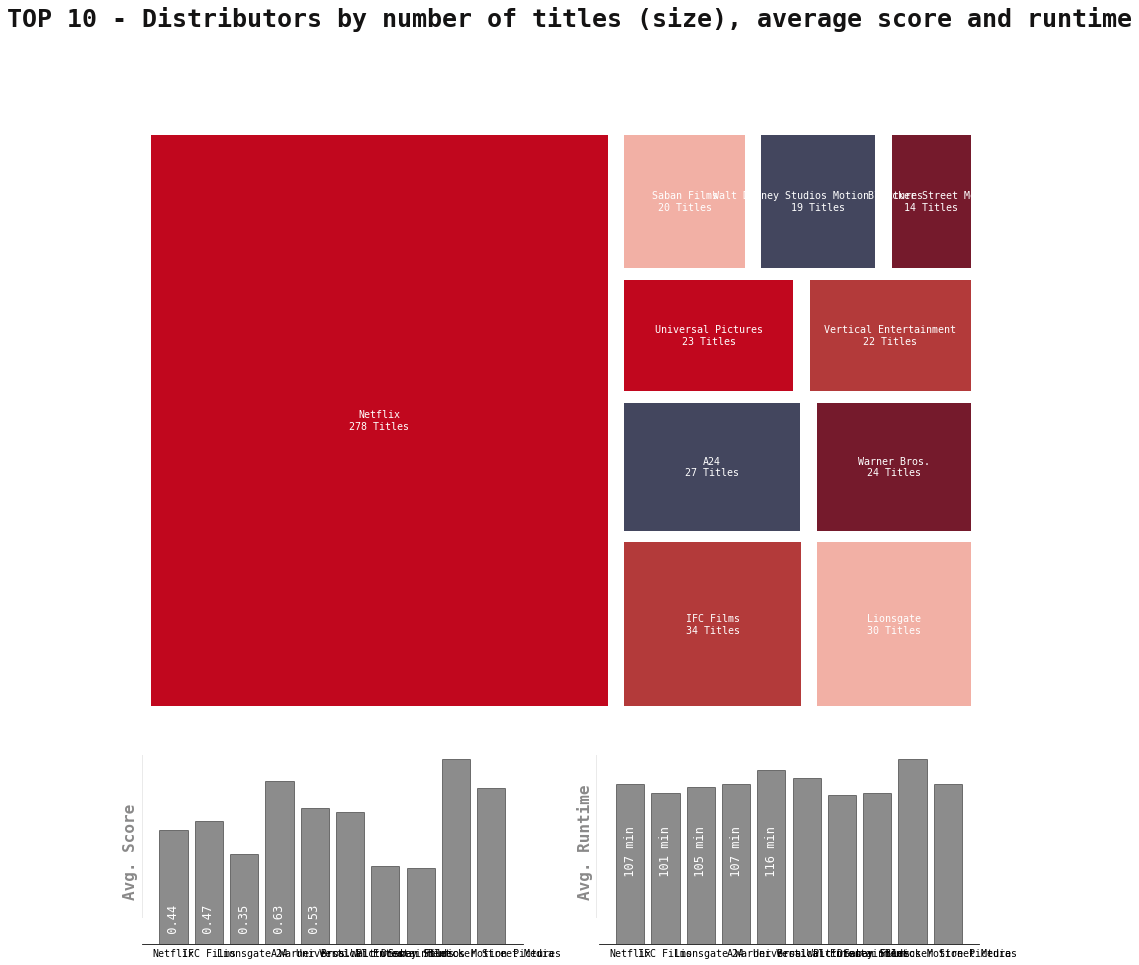

In [42]:
fig = plt.figure(figsize=(15,15))

gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[3,1])

ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

fig.patch.set_facecolor(bg_color)
fig.subplots_adjust(wspace=0.2, hspace=0.1)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)
ax2.set_facecolor(bg_color)

# create labels for treemap
labels = [label +'\n'+ str(count) +' Titles' for label, count in zip(data_dist['Distributor'],data_dist['Count'])]

# create treemap
squarify.plot(
    sizes=data_dist['Count'], label=labels, color=colors, 
    pad=True, ax=ax0, text_kwargs=dict(color='white', fontsize=10, fontweight='light'))

# average runtime
ax1.bar(
    x=data_dist['Distributor'], height=data_dist['MeanScore'],
    color='#000', edgecolor='#000', lw=1, alpha=0.45
)


ax1.tick_params(length=0)
ax1.set_yticks([])
ax1.set_ylabel('')

# average scores
ax2.bar(
    x=data_dist['Distributor'], height=data_dist['MeanRuntime'],
    color='#000', edgecolor='#000', lw=1, alpha=0.45
)

ax2.tick_params(length=0)
ax2.set_yticks([])
ax2.set_ylabel('')

# annotations
for idx in range(0,5): #len(data_language['Lang'])
    ax1.annotate(
        s=f" {np.round(data_dist['MeanScore'][idx],2)} ",
        xy=(data_dist['Distributor'][idx], 0.1),
        rotation=90,
        va='center', ha='center',
        color='#fff', fontsize=12
    )
    ax2.annotate(
        s=f" {int(data_dist['MeanRuntime'][idx])} min",
        xy=(data_dist['Distributor'][idx], 60),
        rotation = 90,
        va='center', ha='center',
        color='#fff', fontsize=12
    )
    
# despine
ax0.axis('off')
for spine in ['top','left','right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Text & Titles
fig.text(
    s='TOP 10 - Distributors by number of titles (size), average score and runtime',
    x=0, y=0.975,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    by number of titles (size)
#    average score and runtime
#    ''',
#    x=0.09, y=0.925,
#    color=txt_color, font = 16
#)

fig.text(
    s='Avg. Score',
    rotation=90,
    x=0.1075, y=0.17,
    color=txt_color,
    fontsize=16,alpha=0.5,fontweight='bold'
)

fig.text(
    s='Avg. Runtime',
    rotation=90,
    x=0.5275, y=0.17,
    color=txt_color,
    fontsize=16,alpha=0.5, fontweight='bold'
)

sl1 = lines.Line2D(xdata=[0.125,0.125], ydata=[0.15,0.3], lw=1, alpha=0.25, color='#aeaeae', transform=fig.transFigure, figure=fig)
sl2 = lines.Line2D(xdata=[0.545,0.545], ydata=[0.15,0.3], lw=1, alpha=0.25, color='#aeaeae', transform=fig.transFigure, figure=fig)
fig.lines.extend([sl1,sl2])

plt.show()

[]

Text(0, 0.5, '')

Text(0.5, 0, '')

(0.0, 1.1)

Text(0.1, 1, 'Quality Score by Month')

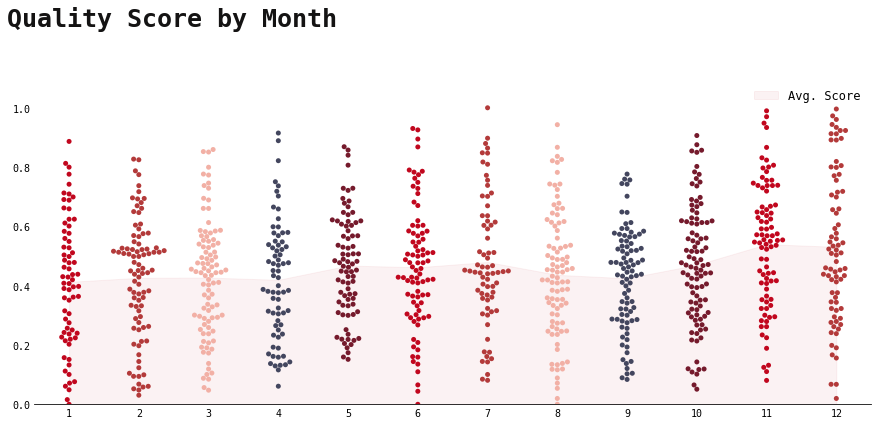

In [34]:
data_month = data.groupby('Rel_month').mean()[['RT_comb_score']].reset_index()

fig, ax = plt.subplots(figsize=(15,6))

fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.plot(data=data_month['Rel_month'], y1=data_month['RT_comb_score'], color=colors[4], lw=10)
ax.fill_between(x=np.arange(0,12), y1=data_month['RT_comb_score'], color=colors[0], alpha=0.05, label='Avg. Score')

sns.swarmplot(data=data, x='Rel_month', y='RT_comb_score', palette=colors, ax=ax)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_ylim(0,1.1)
ax.tick_params(axis='both',length=0)

# despine
for spine in ['top','left','right']:
    ax.spines[spine].set_visible(False)

# Text & Titles
fig.text(
    s='Quality Score by Month',
    x=0.1, y=1,
    color=txt_color,
    fontsize=25, fontweight='bold'
)

#fig.text(
#    s='''
#    The average score is distributed
#    evenly from Jan to Sep, however from
#    Oct (Q3) onwards we can see an 
#    improvement in the score.
#    ''',
#    x=0.09, y=0.94,
#    color=txt_color
#)

plt.legend(loc='Top center',frameon=False, fontsize= 12)
plt.show()

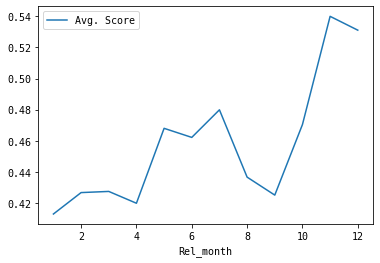

In [ ]:
data_month.plot(x='Rel_month', y='RT_comb_score',  label='Avg. Score')

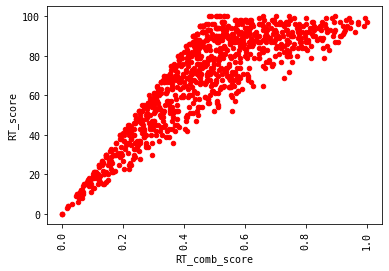

In [ ]:
data.plot.scatter(x='RT_comb_score', y=	'RT_score',c='r', rot=90);

### Running EDA

In [33]:
data = pd.read_pickle(r'/content/gdrive/MyDrive/MSDS_CAPSTONE/Data/master_data_final.pkl')

In [ ]:
data.isnull().sum().sum()

15254

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       1003 non-null   object 
 1   Lang                        1003 non-null   object 
 2   Lang_eng                    1003 non-null   int64  
 3   Rel_year                    1003 non-null   int64  
 4   Rel_month                   1003 non-null   int64  
 5   Distributor                 1001 non-null   object 
 6   Netflix_orig                1003 non-null   int64  
 7   Genre                       1003 non-null   object 
 8   Genre_Action                1003 non-null   uint8  
 9   Genre_Adventure             1003 non-null   uint8  
 10  Genre_Animation             1003 non-null   uint8  
 11  Genre_Biography             1003 non-null   uint8  
 12  Genre_Comedy                1003 non-null   uint8  
 13  Genre_Crime                 1003 

In [ ]:
data.shape

(1003, 99)

In [ ]:
data['Title'].nunique()

1001

In [ ]:
data['Title'].value_counts()

Girl                      2
Ava                       2
2.0                       1
No One Gets Out Alive     1
Late Night                1
                         ..
Extra Ordinary            1
Non-Fiction               1
A Prayer Before Dawn      1
Perfectos desconocidos    1
Just Getting Started      1
Name: Title, Length: 1001, dtype: int64

In [ ]:
data[data['Title']== 'Girl']

,Title,Lang,Lang_eng,Rel_year,Rel_month,Distributor,Netflix_orig,Genre,Genre_Action,Genre_Adventure,...,Actor5_film_scores,Actor5_qual,Actor_avg_qual,Actor_qual_UNK,Actor_nom_cnt,RT_score,RT_rev_cnt,RT_comb_score,RT_url,IMDb_url
78,Girl,French,0,2018,3,Netflix,1,[Drama],0,0,...,"[nan, nan, 0.2092752563149213]",0.063993,0.134694,0,0,84.0,62,0.530871,https://www.rottentomatoes.com/m/girl,http://www.imdb.com/title/tt8254556/
856,Girl,English,1,2020,11,Screen Media Films,0,[Thriller],0,0,...,"[nan, 0.03907848925497942, 0.09629105864303637, nan, nan, nan, nan, 0.13312042746468367, 0.17783185441912794, 0.014711953365754132, 0.04562502589375556, nan, 0.16939586490132852, 0.007025692390978269, 0.15584917778696766, 0.29327404107725036, 0.014842778836854064]",0.147343,0.198172,0,1,57.0,30,0.300447,https://www.rottentomatoes.com/m/girl_2020,https://www.imdb.com/title/tt9392374/


In [ ]:
data[data['Title']== 'Ava']

,Title,Lang,Lang_eng,Rel_year,Rel_month,Distributor,Netflix_orig,Genre,Genre_Action,Genre_Adventure,...,Actor5_film_scores,Actor5_qual,Actor_avg_qual,Actor_qual_UNK,Actor_nom_cnt,RT_score,RT_rev_cnt,RT_comb_score,RT_url,IMDb_url
422,Ava,French,0,2017,12,Bac Films,0,"[Drama, Romance]",0,0,...,[],NaN,0.246070,0,0,97.0,33,0.523615,https://www.rottentomatoes.com/m/ava_2018,https://www.imdb.com/title/tt6194530/
529,Ava,English,1,2020,9,Vertical Entertainment,0,"[Action, Thriller]",1,0,...,"[0.47182228163177586, 0.37807795520903015, 0.40460449564272855, 0.28779736583946564, 0.20732866760797436, nan, 0.18434746512462957, 0.07945365956801415, 0.2328282169985397, 0.313645745358847, 0.1370303213445358, nan, nan, 0.06149460011767053, 0.11068849845122014, 0.16341347687863833, nan, 0.15583215370931225, nan, nan, nan]",0.368495,0.497967,0,6,16.0,38,0.089470,https://www.rottentomatoes.com/m/ava_2020_2,https://www.imdb.com/title/tt8784956/


## Subsetting data by columns that will not be used /are colinear 

In [ ]:
df_sub = data.drop(columns = ['Netflix_orig','Lang_eng','Genre','Rel_year', 'Rating','Dir1', 'Dir1_films', 'Dir1_film_scores','Dir1_qual', 'Dir2', 'Dir2_films', 'Dir2_film_scores','Dir2_qual','Dir3', 'Dir3_films', 'Dir3_film_scores','Dir3_qual','Writer1', 'Writer1_films', 'Writer1_film_scores','Writer1_qual','Writer2', 'Writer2_films', 'Writer2_film_scores', 'Writer2_qual', 'Writer3', 'Writer3_films', 'Writer3_film_scores','Writer3_qual','Actor1',
       'Actor1_films', 'Actor1_film_scores','Actor1_qual','Actor2','Actor2_films', 'Actor2_film_scores', 'Actor2_qual','Actor3','Actor3_films', 'Actor3_film_scores','Actor3_qual','Actor4','Actor4_films', 'Actor4_film_scores','Actor4_qual','Actor5','Actor5_films', 'Actor5_film_scores','Actor5_qual','RT_url', 'IMDb_url','Plot_summ', 'Plot_keywords']) 

In [ ]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       1003 non-null   object 
 1   Lang                        1003 non-null   object 
 2   Rel_month                   1003 non-null   int64  
 3   Distributor                 1001 non-null   object 
 4   Netflix_orig                1003 non-null   int64  
 5   Genre_Action                1003 non-null   uint8  
 6   Genre_Adventure             1003 non-null   uint8  
 7   Genre_Animation             1003 non-null   uint8  
 8   Genre_Biography             1003 non-null   uint8  
 9   Genre_Comedy                1003 non-null   uint8  
 10  Genre_Crime                 1003 non-null   uint8  
 11  Genre_Drama                 1003 non-null   uint8  
 12  Genre_Family                1003 non-null   uint8  
 13  Genre_Fantasy               1003 

## Missing value treatment

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numeric_df = df_sub.select_dtypes(include=numerics)
numeric_df.isnull().sum()

Rel_month                       0
Genre_Action                    0
Genre_Adventure                 0
Genre_Animation                 0
Genre_Biography                 0
Genre_Comedy                    0
Genre_Crime                     0
Genre_Drama                     0
Genre_Family                    0
Genre_Fantasy                   0
Genre_History                   0
Genre_Horror                    0
Genre_LGBTQ                     0
Genre_Music                     0
Genre_Musical                   0
Genre_Mystery                   0
Genre_Romance                   0
Genre_Sci-Fi                    0
Genre_Sport                     0
Genre_Thriller                  0
Genre_War                       0
Genre_Western                   0
Based_on_existing_material      9
Based_on_real_life              9
Rating_General                  0
Rating_Limited                  0
Rating_Not rated                0
Rating_Restricted               0
Runtime                         0
Writer_directo

In [ ]:
numeric_df['Based_on_existing_material'] = numeric_df['Based_on_existing_material'].fillna(0)
numeric_df['Based_on_real_life'] = numeric_df['Based_on_existing_material'].fillna(0)

In [ ]:
numeric_df.isnull().sum()

Rel_month                       0
Genre_Action                    0
Genre_Adventure                 0
Genre_Animation                 0
Genre_Biography                 0
Genre_Comedy                    0
Genre_Crime                     0
Genre_Drama                     0
Genre_Family                    0
Genre_Fantasy                   0
Genre_History                   0
Genre_Horror                    0
Genre_LGBTQ                     0
Genre_Music                     0
Genre_Musical                   0
Genre_Mystery                   0
Genre_Romance                   0
Genre_Sci-Fi                    0
Genre_Sport                     0
Genre_Thriller                  0
Genre_War                       0
Genre_Western                   0
Based_on_existing_material      0
Based_on_real_life              0
Rating_General                  0
Rating_Limited                  0
Rating_Not rated                0
Rating_Restricted               0
Runtime                         0
Writer_directo

In [ ]:
#Labeling unknown actor/director/writer by -1
numeric_df= numeric_df.fillna(-1)
numeric_df.isnull().sum().sum()

0

In [ ]:
numeric_df['Dir_avg_qual'].min()

-1.0

### Label encoding

2 movies had distributor missing , adding NA 

In [ ]:
char = ['object']
char_df = df_sub.select_dtypes(include=char)
char_df = char_df.fillna('NA')
char_df.isnull().sum().sum()

0

In [ ]:
char_df.isnull().sum()

Title            0
Lang             0
Distributor      0
Rating_reason    0
dtype: int64

In [ ]:
char_df['Lang'].value_counts()

English                   845
French                     39
Spanish                    20
German                     12
Japanese                    7
Hindi                       7
Arabic                      6
Italian                     6
Mandarin                    5
Korean                      5
Norwegian                   4
Polish                      4
Portuguese                  3
Indonesian                  3
Persian                     3
Swedish                     3
Thai                        2
Russian                     2
Dutch                       2
Chinese                     2
Dari                        1
Guarani                     1
Yakut                       1
Serbo-Croatian              1
Finnish                     1
None                        1
Georgian                    1
Malay                       1
Estonian                    1
Danish                      1
Bosnian                     1
Galician                    1
Hungarian                   1
American S

In [ ]:
char_df1 =pd.get_dummies(char_df,  columns = ['Lang'])

In [ ]:
char_df1.columns

Index(['Title', 'Distributor', 'Rating_reason', 'Lang_American Sign Language',
       'Lang_Arabic', 'Lang_Bosnian', 'Lang_Chinese', 'Lang_Danish',
       'Lang_Dari', 'Lang_Dutch', 'Lang_English', 'Lang_Estonian',
       'Lang_Finnish', 'Lang_French', 'Lang_Galician', 'Lang_Georgian',
       'Lang_German', 'Lang_Guarani', 'Lang_Hindi', 'Lang_Hungarian',
       'Lang_Hungarian ', 'Lang_Indonesian', 'Lang_Inuktitut', 'Lang_Italian',
       'Lang_Japanese', 'Lang_Khmer ', 'Lang_Korean', 'Lang_Malay',
       'Lang_Mandarin', 'Lang_Marathi', 'Lang_None', 'Lang_Norwegian',
       'Lang_Persian', 'Lang_Polish', 'Lang_Portuguese', 'Lang_Quechua',
       'Lang_Russian', 'Lang_Serbo-Croatian', 'Lang_Spanish', 'Lang_Swedish',
       'Lang_Swiss German', 'Lang_Thai', 'Lang_Wolof', 'Lang_Xhosa',
       'Lang_Yakut', 'Lang_Yiddish'],
      dtype='object')

In [ ]:
char_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Title                        1003 non-null   object
 1   Distributor                  1003 non-null   object
 2   Rating_reason                1003 non-null   object
 3   Lang_American Sign Language  1003 non-null   uint8 
 4   Lang_Arabic                  1003 non-null   uint8 
 5   Lang_Bosnian                 1003 non-null   uint8 
 6   Lang_Chinese                 1003 non-null   uint8 
 7   Lang_Danish                  1003 non-null   uint8 
 8   Lang_Dari                    1003 non-null   uint8 
 9   Lang_Dutch                   1003 non-null   uint8 
 10  Lang_English                 1003 non-null   uint8 
 11  Lang_Estonian                1003 non-null   uint8 
 12  Lang_Finnish                 1003 non-null   uint8 
 13  Lang_French                  1003

In [ ]:
char_df1.isnull().sum().sum()

0

In [ ]:
char_df1.shape

(1003, 46)

Reviewing Distribution of Char and Numeric datatypes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11e9a5d310>,
      dtype=object)

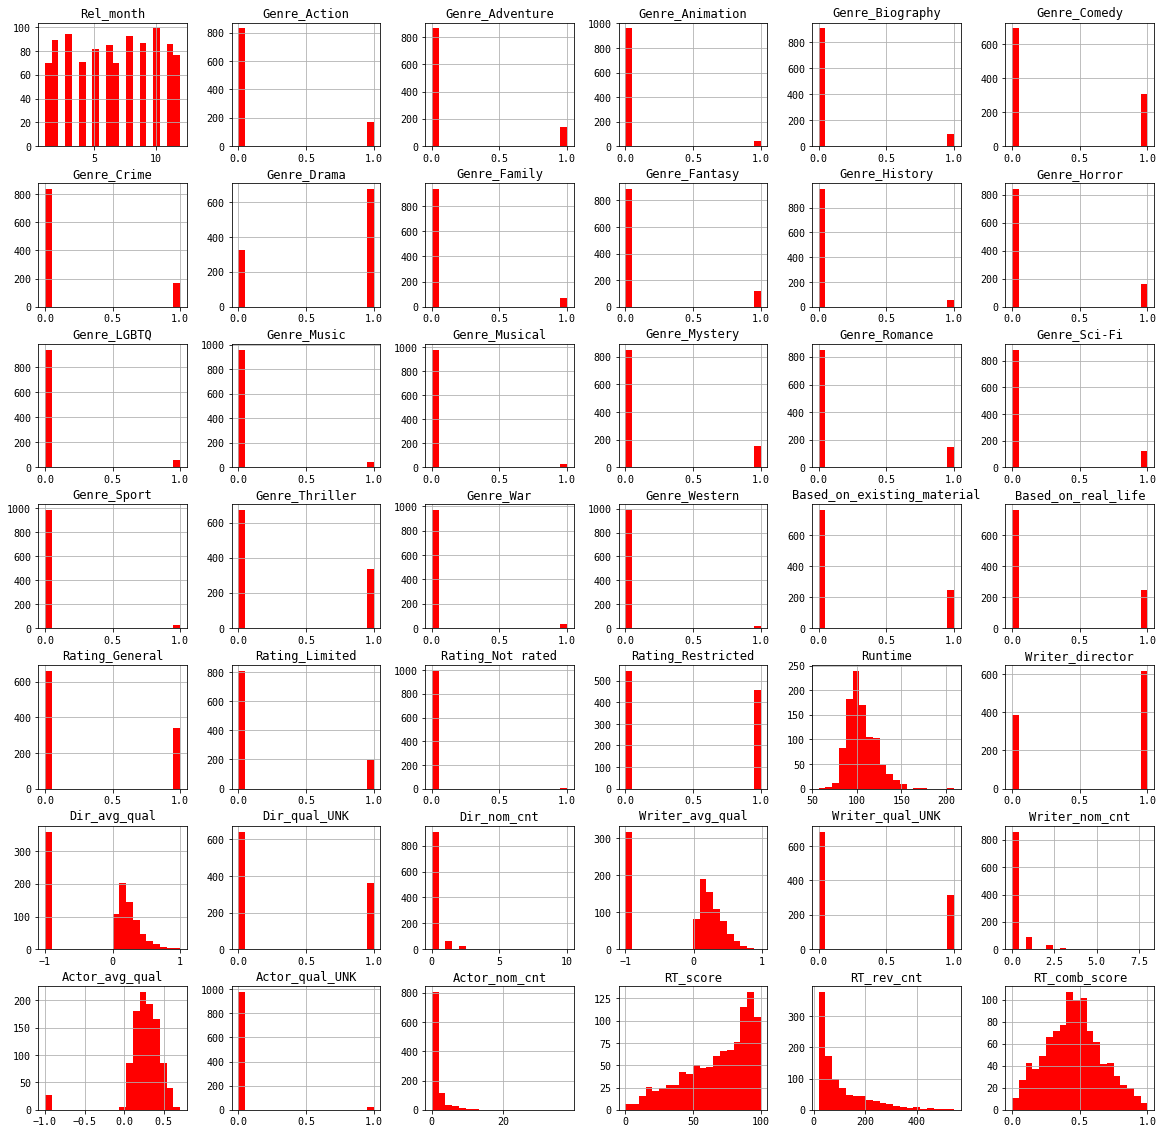

In [ ]:
numeric_df.hist(bins =20, figsize =(20,20), color = 'r')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f6ee8a090>,
      dtype=object)

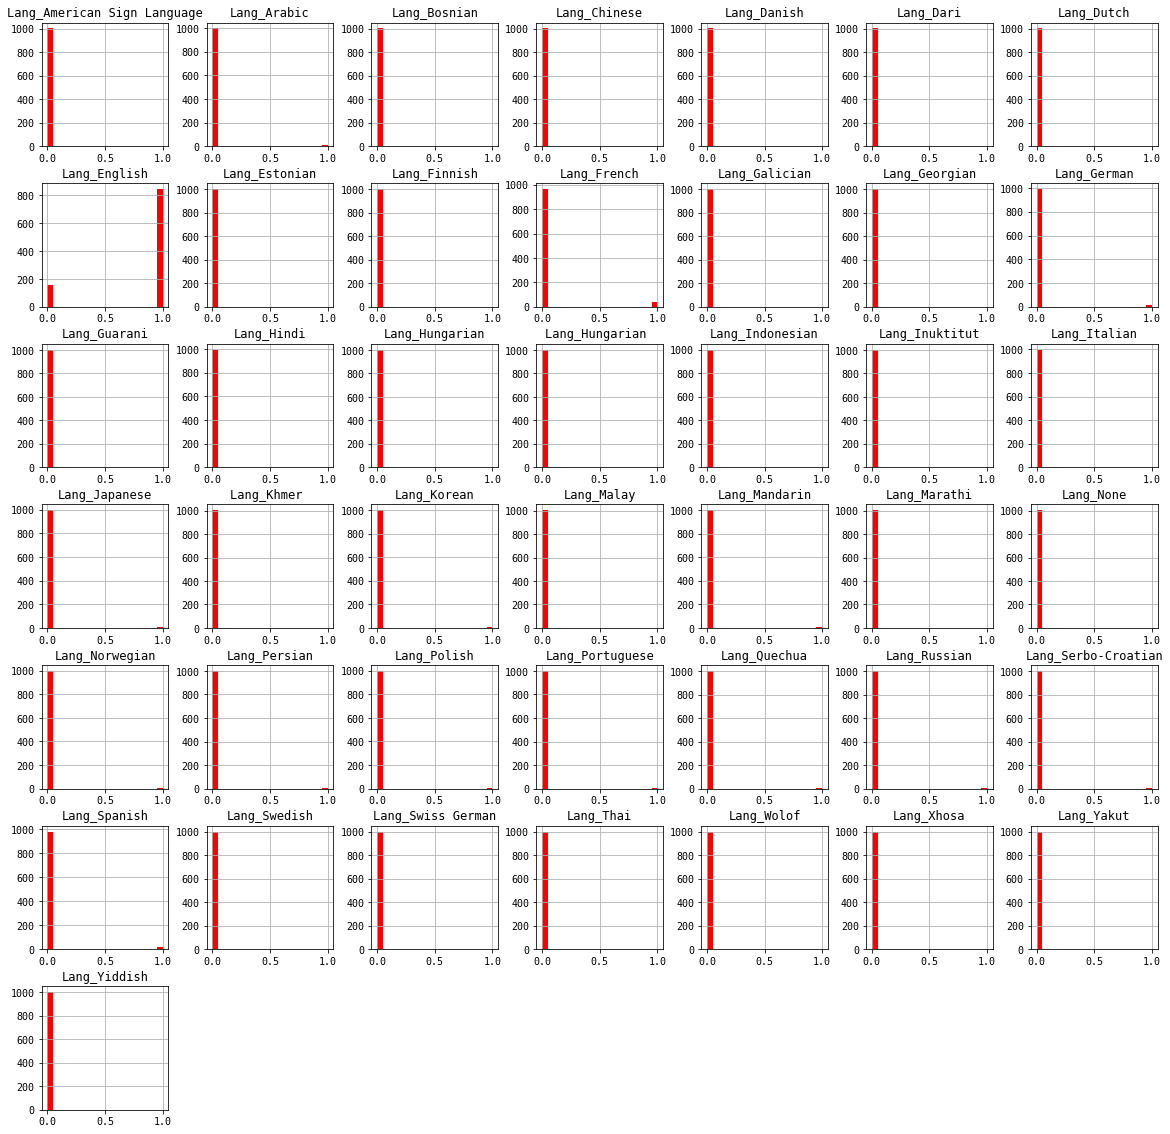

In [ ]:
char_df1.hist(bins =20, figsize =(20,20), color = 'r')
plt.show()

In [ ]:
#final dataset post missing value treatment
final_df = pd.concat([char_df1, numeric_df], axis = 1)
final_df.shape

(1003, 88)

### Correlation study

### Correlation limiting to top 5 Languages = Eng, Spanish, Hindi, French, German

In [ ]:
#keeping only top 5 lang

final_df1 = final_df.drop(columns = ['Rating_reason',  'Lang_Arabic', 'Lang_Korean','Lang_Estonian','Lang_Finnish','Lang_Georgian', 'Based_on_existing_material',
       'Lang_Chinese', 'Lang_Danish', 'Lang_Dutch', 'Lang_Bosnian', 'Dir_qual_UNK', 'Actor_qual_UNK','Writer_qual_UNK',
        'Lang_Hungarian ', 'Lang_Indonesian', 'Lang_Italian','Lang_Persian','Lang_Quechua','Lang_Swedish',
       'Lang_Japanese', 'Lang_Khmer ', 'Lang_Malay', 'Lang_Mandarin', 'Lang_Marathi', 'Lang_Norwegian',
       'Lang_Polish', 'Lang_Portuguese',  'Lang_Russian', 'Lang_Swedish', 'Lang_Thai', 'Lang_Swiss German',
       'Lang_Serbo-Croatian','Lang_American Sign Language','Lang_Dari','Lang_None','Lang_Yiddish','Lang_Hungarian',
       'Lang_Yakut','Lang_Galician','Lang_Guarani','Lang_Indonesian','Lang_Hungarian','Lang_Inuktitut','Lang_Wolof','Lang_Xhosa','Rating_General'])

In [ ]:
corrMatrix = final_df1.corr()

<Figure size 1440x1440 with 0 Axes>

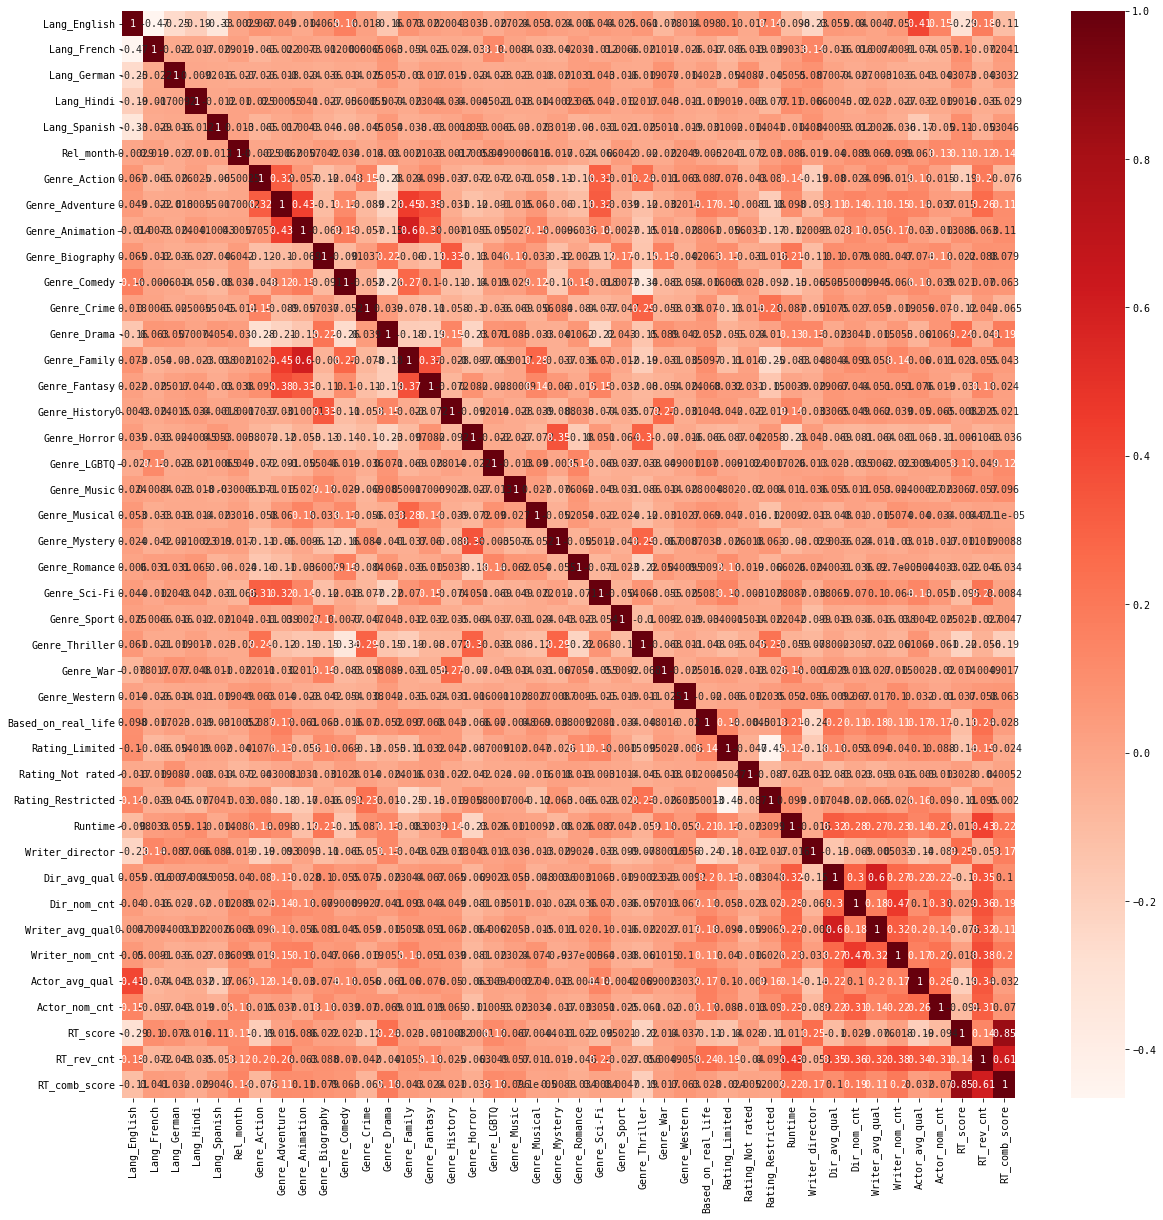

In [ ]:
plt.figure(figsize= (20,20))
sns.heatmap(corrMatrix, annot = True , cmap = "Reds")
plt.show()

<Figure size 1440x1440 with 0 Axes>

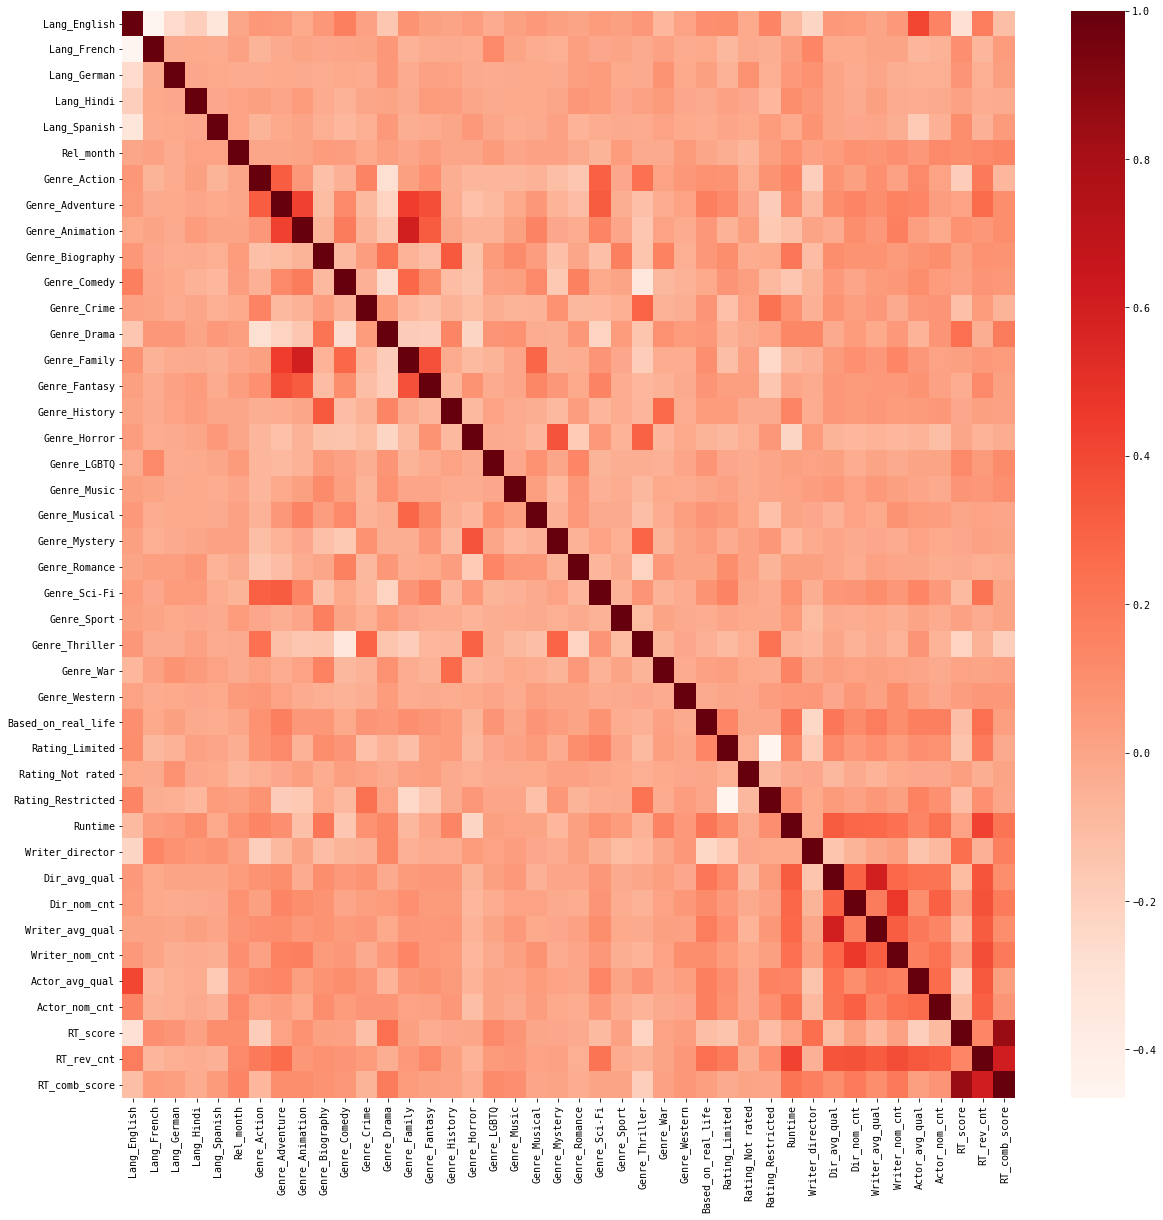

In [ ]:
plt.figure(figsize= (20,20))
sns.heatmap(corrMatrix, annot = False , cmap = "Reds")
plt.show()

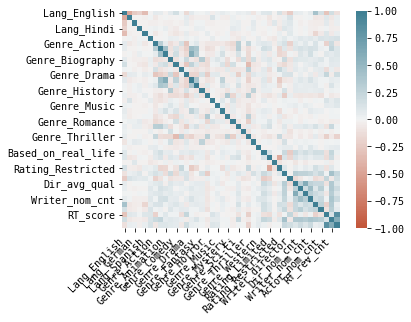

In [ ]:
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Creating the df to start working with

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numeric_df = final_df1.select_dtypes(include=numerics)
numeric_df= numeric_df.fillna(0)

In [ ]:
numeric_df.isnull().sum().sum()

0

In [ ]:
(numeric_df.columns)

Index(['Lang_English', 'Lang_French', 'Lang_German', 'Lang_Hindi',
       'Lang_Spanish', 'Rel_month', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History',
       'Genre_Horror', 'Genre_LGBTQ', 'Genre_Music', 'Genre_Musical',
       'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Sport',
       'Genre_Thriller', 'Genre_War', 'Genre_Western', 'Based_on_real_life',
       'Rating_Limited', 'Rating_Not rated', 'Rating_Restricted', 'Runtime',
       'Writer_director', 'Dir_avg_qual', 'Dir_nom_cnt', 'Writer_avg_qual',
       'Writer_nom_cnt', 'Actor_avg_qual', 'Actor_nom_cnt', 'RT_score',
       'RT_rev_cnt', 'RT_comb_score'],
      dtype='object')

In [ ]:
numeric_df1 = numeric_df.drop(columns = ['RT_score', 'RT_comb_score','RT_rev_cnt'])
numeric_df1.columns
len = len(numeric_df1.columns)

Index(['Lang_English', 'Lang_French', 'Lang_German', 'Lang_Hindi',
       'Lang_Spanish', 'Rel_month', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History',
       'Genre_Horror', 'Genre_LGBTQ', 'Genre_Music', 'Genre_Musical',
       'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Sport',
       'Genre_Thriller', 'Genre_War', 'Genre_Western', 'Based_on_real_life',
       'Rating_Limited', 'Rating_Not rated', 'Rating_Restricted', 'Runtime',
       'Writer_director', 'Dir_avg_qual', 'Dir_nom_cnt', 'Writer_avg_qual',
       'Writer_nom_cnt', 'Actor_avg_qual', 'Actor_nom_cnt'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardizing the x's
scalar = StandardScaler()
numeric_df2 = scalar.fit_transform(numeric_df1)
numeric_df2 = pd.DataFrame(numeric_df2, columns = numeric_df1.columns)

### Multicollineariy check

In [ ]:
#numeric_df3 = numeric_df2.drop(columns = ['Dir1_qual','Dir2_qual','Dir3_qual'])
numeric_df2.shape

(1003, 39)

In [ ]:
#Checking for multicollinearity for the numeric variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df2.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_df2.values, i)
for i in range(39)]
print(vif_data)

               feature       VIF
0         Lang_English  2.404611
1          Lang_French  1.535294
2          Lang_German  1.192699
3           Lang_Hindi  1.123673
4         Lang_Spanish  1.281110
5            Rel_month  1.061874
6         Genre_Action  1.546660
7      Genre_Adventure  1.822118
8      Genre_Animation  1.813377
9      Genre_Biography  1.380340
10        Genre_Comedy  1.538299
11         Genre_Crime  1.290076
12         Genre_Drama  1.494178
13        Genre_Family  2.228330
14       Genre_Fantasy  1.336006
15       Genre_History  1.249705
16        Genre_Horror  1.499388
17         Genre_LGBTQ  1.084823
18         Genre_Music  1.063814
19       Genre_Musical  1.156795
20       Genre_Mystery  1.294633
21       Genre_Romance  1.182788
22        Genre_Sci-Fi  1.301565
23         Genre_Sport  1.093996
24      Genre_Thriller  1.733362
25           Genre_War  1.138355
26       Genre_Western  1.051951
27  Based_on_real_life  1.233432
28      Rating_Limited  1.748130
29    Rati

In [ ]:
vif_data.to_csv('vif.csv')

In [ ]:
vif_data['VIF'].describe()

count    40.000000
mean           inf
std            NaN
min       1.051286
25%       1.191162
50%       1.358002
75%       1.603802
max            inf
Name: VIF, dtype: float64

In [ ]:
to_keep= vif_data[vif_data['VIF'] <= 12] # ideal value 10-12
to_keep.shape

(39, 2)

In [ ]:
cols = list(to_keep['feature'].T)
#cols

### X and y separation

In [ ]:
y = numeric_df['RT_comb_score']
#y1 = numeric_df['RT_score']
X = numeric_df2[cols]

<Figure size 720x720 with 0 Axes>

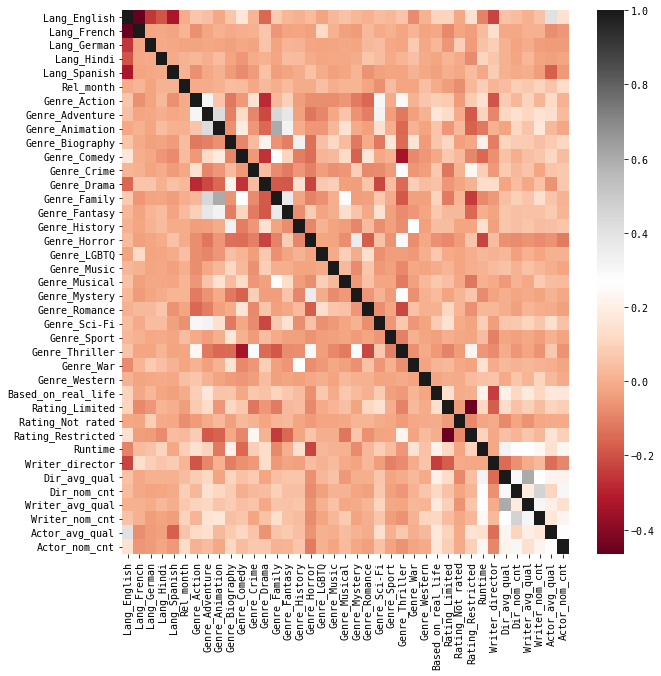

In [ ]:
corr = X.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr, cmap = 'RdGy')
plt.show()

## PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

PCA(n_components=12)

[ 8.71 15.85 22.2  27.18 31.42 35.14 38.76 41.97 45.03 48.06 51.01 53.75]


In [ ]:
pca = PCA(.95) #Keep Principal Components that retain 95% variance
ProjectedDf = pca.fit_transform(X)
ProjectedDf

array([[-2.02246955e+00, -1.61515244e+00,  7.07929277e-01, ...,
         1.04955143e+00,  1.68875608e+00,  1.38422055e-01],
       [-7.61947094e-01, -4.48908021e-02,  2.87172754e+00, ...,
         2.25589381e-01,  5.76548237e-01, -7.24769669e-01],
       [-1.35476262e-02,  3.15790369e+00,  1.67978865e+00, ...,
        -3.26127684e-01,  3.01307421e-01,  4.64189257e-04],
       ...,
       [ 5.53867468e+00, -1.63541182e+00, -1.93367819e+00, ...,
        -6.56456834e-01,  4.95684303e-01, -1.91075186e-01],
       [-4.78195028e-01, -5.76005253e-01, -1.13018627e+00, ...,
        -8.57335883e-01, -1.12388336e-01,  9.03938886e-01],
       [ 8.84513573e-01,  6.81936660e-01,  4.52572908e-01, ...,
        -1.50696787e-01, -3.29524552e-01, -4.28196543e-01]])

In [ ]:
counts = np.unique(pca.explained_variance_, return_counts=True)
len= np.count_nonzero(counts)

## Testing with Regression

## Train test split

In [ ]:
#Splitting train dataset into train and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=101)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

LinearRegression()

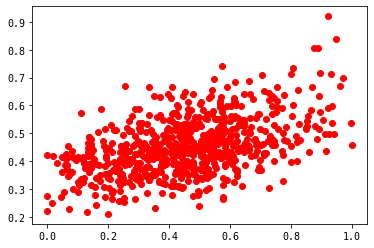

In [ ]:
plt.scatter(y_train, Y_pred, color = 'r')
plt.show()

In [ ]:
linear_regressor.score(X_train, y_train) , linear_regressor.score(X_valid, y_valid)

(0.2381624302074563, 0.1505717330491647)

The score is the coefficient of determination and is defined as ((y_true - y_pred)** 2).sum() and  is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

## Transforming y

In [ ]:
y.describe()

count    1003.000000
mean        0.458238
std         0.207565
min         0.000000
25%         0.308299
50%         0.454045
75%         0.586633
max         1.000000
Name: RT_comb_score, dtype: float64

In [ ]:
#RT_comb_score
y_class = np.array(y >= 0.58, dtype=int).reshape(-1)
np.unique(y_class, return_counts=True)

(array([0, 1]), array([742, 261]))

In [ ]:
261/1003

0.26021934197407776

## Variable Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X, y_class)

RandomForestClassifier(n_estimators=20)

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

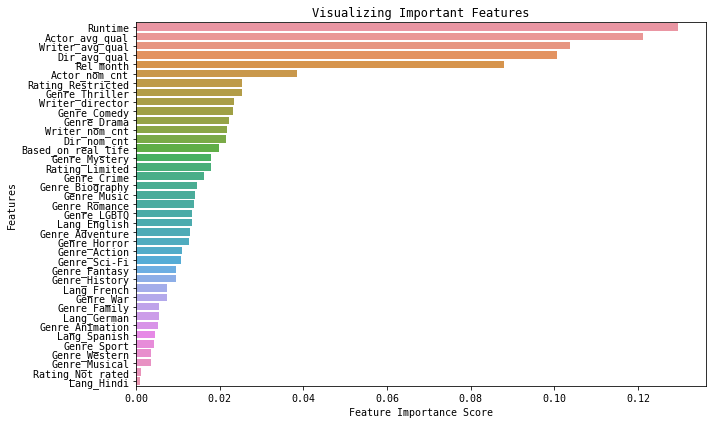

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

## Variable Importance

In [ ]:
feature_imp.to_csv('var_imp.csv')
feature_imp= pd.DataFrame(feature_imp.reset_index())
feature_imp['index'][:30]

0                Runtime
1         Actor_avg_qual
2           Dir_avg_qual
3        Writer_avg_qual
4              Rel_month
5          Actor_nom_cnt
6        Writer_director
7         Writer_nom_cnt
8         Genre_Thriller
9            Dir_nom_cnt
10          Genre_Comedy
11           Genre_Drama
12         Genre_Mystery
13    Based_on_real_life
14         Genre_Fantasy
15       Genre_Biography
16          Genre_Sci-Fi
17           Genre_LGBTQ
18          Lang_English
19           Genre_Music
20           Genre_Crime
21       Genre_Adventure
22         Genre_Romance
23          Genre_Horror
24          Genre_Action
25         Genre_History
26           Lang_French
27         Genre_Western
28          Genre_Family
29             Genre_War
Name: index, dtype: object

## Train test split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y , test_size=0.3, random_state=101)

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
# fit decisiontree based models
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = [
    ('lgbm',LGBMRegressor()),
    ('catb',CatBoostRegressor(verbose=0)),
    ('xgb',XGBRegressor(verbosity=0)),
    ('RF',RandomForestRegressor(verbose=0))
]

results = dict()

for name, model in models:
    model.fit(X_train, y_train)
    y_hat = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_hat, squared=False)
    results[name] = rmse 

LGBMRegressor()

XGBRegressor(verbosity=0)

RandomForestRegressor()

In [ ]:
df_results = pd.DataFrame([results])
df_results

,lgbm,catb,xgb,RF
0,0.202002,0.193794,0.196899,0.195331


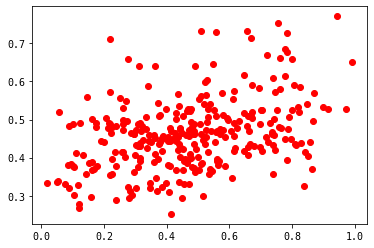

In [ ]:
plt.scatter(y_valid, y_hat, color = 'r')
plt.show()

## Random Forest-Classification

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y_class , test_size=0.3, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
pred_x= clf.predict(X_train)

In [ ]:
print("Precision :", round((precision_score(y_train, pred_x))*100,2))
print("Recall  :",round((recall_score(y_train, pred_x))*100,2))
print("F1 Score :",round((f1_score(y_train, pred_x))*100,2))

Precision : 91.3
Recall  : 12.0
F1 Score : 21.21


Text(0.5, 1.05, 'Confusion Matrix for RF')

Text(33.0, 0.5, 'Predicted Survival')

Text(0.5, 15.0, 'Actual Survival')

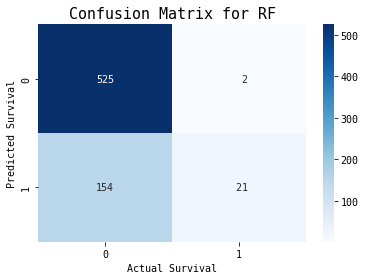

In [ ]:
cm = confusion_matrix(y_train, pred_x)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_train, pred_x),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for RF', y=1.05, size=15)
plt.ylabel('Predicted Survival')
plt.xlabel('Actual Survival')

In [ ]:
pred_xt= clf.predict(X_valid)
print("Precision :", round((precision_score(y_valid, pred_xt))*100,2))
print("Recall  :",round((recall_score(y_valid, pred_xt))*100,2))
print("F1 Score :",round((f1_score(y_valid, pred_xt))*100,2))

Precision : 77.78
Recall  : 8.14
F1 Score : 14.74


Text(0.5, 1.05, 'Confusion Matrix for  RF')

Text(33.0, 0.5, 'Predicted Survival')

Text(0.5, 15.0, 'Actual Survival')

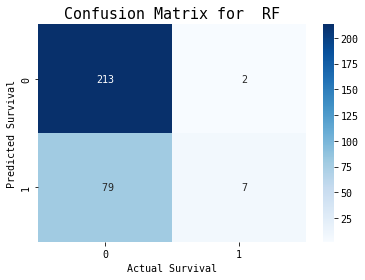

In [ ]:
cm = confusion_matrix(y_valid, pred_xt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_valid, pred_xt),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for  RF', y=1.05, size=15)
plt.ylabel('Predicted Survival')
plt.xlabel('Actual Survival')

# Binning y variable

In [ ]:
y.describe()

count    1003.000000
mean        0.458238
std         0.207565
min         0.000000
25%         0.308299
50%         0.454045
75%         0.586633
max         1.000000
Name: RT_comb_score, dtype: float64

In [ ]:
#RT_comb_score
y_class = np.array(y >= 0.58, dtype=int).reshape(-1) #P75
np.unique(y_class, return_counts=True)

(array([0, 1]), array([742, 261]))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y_class, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    ('lgbm',LGBMClassifier()),
    ('catb',CatBoostClassifier(verbose=0)),
    ('xgb',XGBClassifier(verbosity=0)),
    ('RF',RandomForestClassifier(verbose=0))
]

results = dict()

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_valid = model.predict(X_valid)
    accuracy = round(accuracy_score(y_hat_valid,y_valid)*100,2)
    results[name] = accuracy

LGBMClassifier()

XGBClassifier(verbosity=0)

RandomForestClassifier()

In [ ]:
df_results = pd.DataFrame([results])
df_results #based on accuracy

,lgbm,catb,xgb,RF
0,72.14,75.62,72.14,74.13


In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
class_weights = dict({0:1, 1:1}) #5
models = [
    ('lgbm',LGBMClassifier(iterations=500,
                           verbose=100,
                           eval_metric="F1",
                           scale_pos_weight=1)),
    ('catb',CatBoostClassifier(iterations=500,
                           verbose=100,
                           eval_metric="F1",
                           scale_pos_weight=1)),
    ('xgb',XGBClassifier(iterations=500,
                           verbose=100,
                           scale_pos_weight=1)),

    ]

results = dict()

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_valid = model.predict(X_valid)
    accuracy = round(accuracy_score(y_hat_valid,y_valid)*100,2)
    #precision_score = round(precision_score(y_hat_valid,y_valid)*100,2)
    results[name] = {accuracy }

LGBMClassifier(eval_metric='F1', iterations=500, scale_pos_weight=1,
               verbose=100)

Learning rate set to 0.017704
0:	learn: 0.3219178	total: 2.8ms	remaining: 1.4s
100:	learn: 0.4285714	total: 318ms	remaining: 1.26s
200:	learn: 0.5347222	total: 700ms	remaining: 1.04s
300:	learn: 0.6603175	total: 1.12s	remaining: 742ms
400:	learn: 0.7610619	total: 1.41s	remaining: 349ms
499:	learn: 0.8461538	total: 1.69s	remaining: 0us


XGBClassifier(iterations=500, verbose=100)

In [ ]:
df_results = pd.DataFrame([results])
df_results

,lgbm,catb,xgb
0,{72.14},{75.62},{72.14}


## RF with weighted class

In [ ]:
model = RandomForestClassifier(class_weight={0: 1, 1: 5})

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5})

In [ ]:
from sklearn.metrics import roc_auc_score
accuracy= []
recall =[]
roc_auc= []
precision = []
y_pred = model.predict(X_train)
accuracy.append(round(accuracy_score(y_train, y_pred),4))
recall.append(round(recall_score(y_train, y_pred),4))
roc_auc.append(round(roc_auc_score(y_train, y_pred),4))
precision.append(round(precision_score(y_train, y_pred),4))

model_names = ['RF_Train']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

,Accuracy,Recall,Roc_Auc,Precision
RF_Train,0.9988,1.0,0.9992,0.9952


In [ ]:
confusion_matrix_train = confusion_matrix(y_train, model.predict(X_train))
confusion_matrix_train = pd.DataFrame(confusion_matrix_train,
                                      index=["Actual_No","Actual_Yes"],
                                      columns=["Predicted_No","Predicted_Yes"])

display(confusion_matrix_train)

,Predicted_No,Predicted_Yes
Actual_No,593,1
Actual_Yes,0,208


In [ ]:
from sklearn.metrics import roc_auc_score
accuracy= []
recall =[]
roc_auc= []
precision = []
model_names =[]

y_pred = model.predict(X_valid)
accuracy.append(round(accuracy_score(y_valid, y_pred),4))
recall.append(round(recall_score(y_valid, y_pred),4))
roc_auc.append(round(roc_auc_score(y_valid, y_pred),4))
precision.append(round(precision_score(y_valid, y_pred),4))

model_names = ['RF_Validation']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision
RF_Validation,0.7612,0.1509,0.5653,0.7273


In [ ]:
confusion_matrix_test = confusion_matrix(y_valid, model.predict(X_valid))
confusion_matrix_test = pd.DataFrame(confusion_matrix_test,
                                     index=["Actual_No","Actual_Yes"],
                                     columns=["Predicted_No","Predicted_Yes"])

display(confusion_matrix_test)

,Predicted_No,Predicted_Yes
Actual_No,145,3
Actual_Yes,45,8


###XGBoost

In [ ]:
model = XGBClassifier(iterations=500,
                           verbose=100,
                           scale_pos_weight=1)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(iterations=500, verbose=100)

In [ ]:
accuracy= []
recall =[]
roc_auc= []
precision = []
y_pred = model.predict(X_train)
accuracy.append(round(accuracy_score(y_train, y_pred),4))
recall.append(round(recall_score(y_train, y_pred),4))
roc_auc.append(round(roc_auc_score(y_train, y_pred),4))
precision.append(round(precision_score(y_train, y_pred),4))

model_names = ['XGBoost_Train']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_Train,0.8691,0.5144,0.7538,0.964


In [ ]:
confusion_matrix_train = confusion_matrix(y_train, model.predict(X_train))
confusion_matrix_train = pd.DataFrame(confusion_matrix_train,
                                      index=["Actual_No","Actual_Yes"],
                                      columns=["Predicted_No","Predicted_Yes"])

display(confusion_matrix_train)

,Predicted_No,Predicted_Yes
Actual_No,590,4
Actual_Yes,101,107


In [ ]:
from sklearn.metrics import roc_auc_score
accuracy= []
recall =[]
roc_auc= []
precision = []
model_names =[]

y_pred = model.predict(X_valid)
accuracy.append(round(accuracy_score(y_valid, y_pred),4))
recall.append(round(recall_score(y_valid, y_pred),4))
roc_auc.append(round(roc_auc_score(y_valid, y_pred),4))
precision.append(round(precision_score(y_valid, y_pred),4))

model_names = ['XGBoost_Validation']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_Validation,0.7214,0.2264,0.5625,0.4444


In [ ]:
confusion_matrix_test = confusion_matrix(y_valid, model.predict(X_valid))
confusion_matrix_test = pd.DataFrame(confusion_matrix_test,
                                     index=["Actual_No","Actual_Yes"],
                                     columns=["Predicted_No","Predicted_Yes"])

display(confusion_matrix_test)

,Predicted_No,Predicted_Yes
Actual_No,133,15
Actual_Yes,41,12


###Lgbm 

Hyperparameter tuning 

>10 0.799 (0.030)
>50 0.884 (0.033)
>100 0.909 (0.030)
>500 0.913 (0.029)
>1000 0.913 (0.029)
>5000 0.913 (0.029)


{'boxes': [<matplotlib.lines.Line2D at 0x7f11c982fd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11c9835dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f11c97c3390>,
 'means': [<matplotlib.lines.Line2D at 0x7f11c97bde10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f11c97bd8d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f11c9835350>,
  <matplotlib.lines.Line2D at 0x7f11c978dfd0>]}

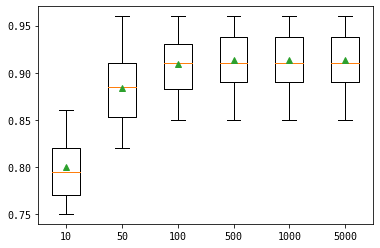

In [ ]:
# explore lightgbm number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n, reg_alpha= 1, scale_pos_weight=5,
                       random_state = 123, iterations=500, num_leaves = 60, 
                           verbose=100,eval_metric="F1",  colsample_bytree = 0.6)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y_class, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y_class = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Based on the highest performing model

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier( reg_alpha= 1, scale_pos_weight=5,
                       random_state = 123, iterations=1000, num_leaves = 60, 
                           verbose=100,
                           eval_metric="F1", n_estimators = 500, colsample_bytree = 0.6
                       #, learning_rate = 0.01
                           )
#is_unbalance = True,

In [ ]:
model.fit(X_train,y_train , eval_metric="F1" )

LGBMClassifier(colsample_bytree=0.6, eval_metric='F1', iterations=1000,
               n_estimators=500, num_leaves=60, random_state=123, reg_alpha=1,
               scale_pos_weight=5, verbose=100)

In [ ]:
from sklearn.metrics import roc_auc_score
accuracy= []
recall =[]
roc_auc= []
precision = []
y_pred = model.predict(X_train)
accuracy.append(round(accuracy_score(y_train, y_pred),4))
recall.append(round(recall_score(y_train, y_pred),4))
roc_auc.append(round(roc_auc_score(y_train, y_pred),4))
precision.append(round(precision_score(y_train, y_pred),4))

model_names = ['Lgbm_Train']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

,Accuracy,Recall,Roc_Auc,Precision
Lgbm_Train,0.9925,1.0,0.995,0.9718


In [ ]:
confusion_matrix_train = confusion_matrix(y_train, model.predict(X_train))
confusion_matrix_train = pd.DataFrame(confusion_matrix_train,
                                      index=["Actual_No","Actual_Yes"],
                                      columns=["Predicted_No","Predicted_Yes"])

display(confusion_matrix_train)

,Predicted_No,Predicted_Yes
Actual_No,589,6
Actual_Yes,0,207


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

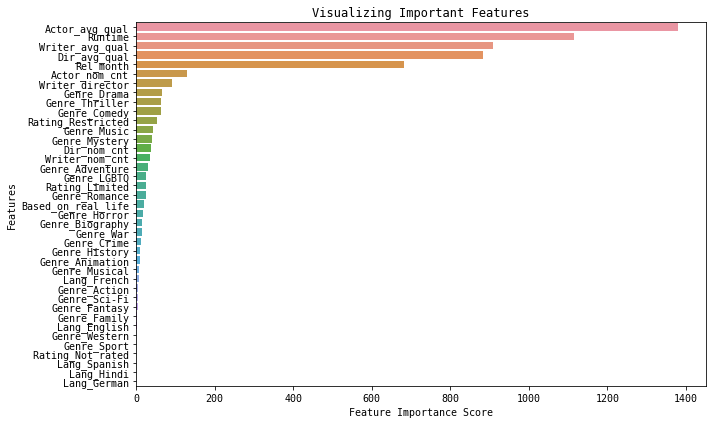

In [ ]:
#plot_importance()
feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [ ]:
feat_imp = pd.DataFrame(model.feature_importances_, index=X_valid.columns, columns=["Importance"])
feat_imp.sort_values(by="Importance", ascending=False)

,Importance
Actor_avg_qual,1381
Runtime,1114
Writer_avg_qual,908
Dir_avg_qual,882
Rel_month,681
Actor_nom_cnt,130
Writer_director,91
Genre_Drama,66
Genre_Thriller,62
Genre_Comedy,62


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.6 MB/s 


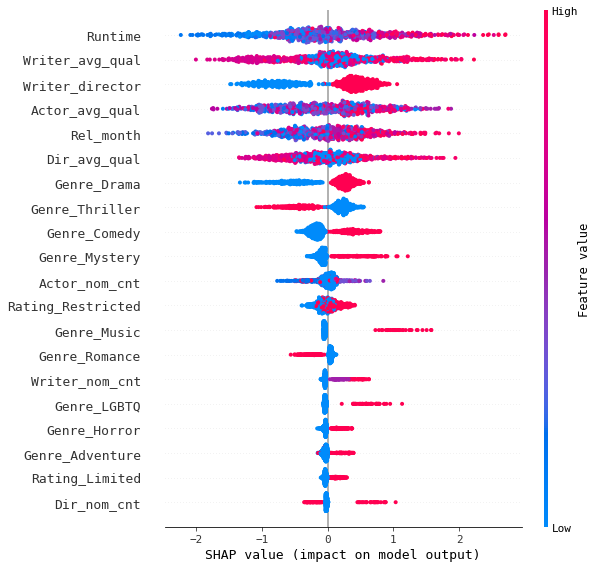

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)

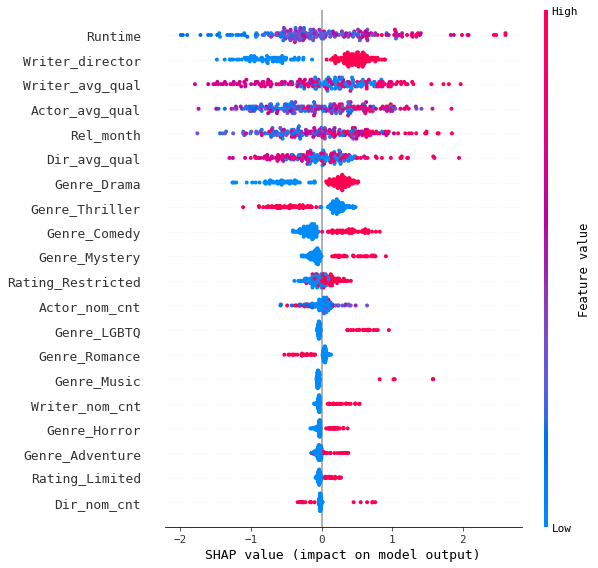

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_valid)
#shap.summary_plot(shap_values, X_valid)
shap.summary_plot(shap_values[1], X_valid)


In [ ]:
confusion_matrix_test = confusion_matrix(y_valid, model.predict(X_valid))
confusion_matrix_test = pd.DataFrame(confusion_matrix_test,
                                     index=["Actual_No","Actual_Yes"],
                                     columns=["Predicted_No","Predicted_Yes"])

display(confusion_matrix_test)

,Predicted_No,Predicted_Yes
Actual_No,138,10
Actual_Yes,8,45


In [ ]:
from sklearn.metrics import roc_auc_score
accuracy= []
recall =[]
roc_auc= []
precision = []
model_names =[]

y_pred = model.predict(X_valid)
accuracy.append(round(accuracy_score(y_valid, y_pred),4))
recall.append(round(recall_score(y_valid, y_pred),4))
roc_auc.append(round(roc_auc_score(y_valid, y_pred),4))
precision.append(round(precision_score(y_valid, y_pred),4))

model_names = ['Lgbm_Validation']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision
Lgbm_Validation,0.9104,0.8491,0.8907,0.8182


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], X_valid.iloc[1,:])

In [ ]:
X_valid['y_pred'] = y_pred

In [ ]:
X_valid['y_class'] = y_valid

In [ ]:
X_valid.head(5)

,Lang_English,Lang_French,Lang_German,Lang_Hindi,Lang_Spanish,Rel_month,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,...,Runtime,Writer_director,Dir_avg_qual,Dir_nom_cnt,Writer_avg_qual,Writer_nom_cnt,Actor_avg_qual,Actor_nom_cnt,y_pred,y_class
953,0.432414,-0.201138,-0.110041,-0.083834,-0.142639,-1.340471,-0.456545,-0.404442,-0.214199,-0.323459,...,0.930308,-1.264296,0.786383,-0.243489,0.830573,-0.326711,0.351366,-0.010210,0,0
612,0.432414,-0.201138,-0.110041,-0.083834,-0.142639,-1.632434,-0.456545,-0.404442,-0.214199,-0.323459,...,-0.917290,0.790954,-1.303770,-0.243489,-1.429501,-0.326711,-5.046481,-0.389493,0,0
969,-2.312596,-0.201138,9.087537,-0.083834,-0.142639,0.703274,-0.456545,-0.404442,-0.214199,-0.323459,...,0.191268,0.790954,0.530001,-0.243489,0.416099,-0.326711,0.132106,-0.389493,0,1
404,0.432414,-0.201138,-0.110041,-0.083834,-0.142639,0.119347,-0.456545,-0.404442,-0.214199,-0.323459,...,-1.409983,0.790954,-1.303770,-0.243489,-1.429501,-0.326711,-0.487943,-0.389493,0,0
677,0.432414,-0.201138,-0.110041,-0.083834,-0.142639,-1.048507,-0.456545,-0.404442,-0.214199,3.091585,...,0.930308,0.790954,0.648870,-0.243489,0.944686,-0.326711,1.550747,-0.010210,1,0


In [ ]:
Predicted = pd.concat([data, X_valid], axis = 1)

In [ ]:
Predicted.shape

(1003, 140)

In [ ]:
Predicted.to_csv('Predictions.csv')

**LGBM is our best performing model**